#Libraries

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt


from google.colab import files

pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', 30)

#Dataset

The dataset is on petroleum and gas production in Queensland, Australia.

https://www.data.qld.gov.au/dataset

In [ ]:
url = "https://www.data.qld.gov.au/datastore/dump/9746212a-e0c6-484d-95ad-b2be1c46027d?bom=True"

In [ ]:
pet_gas_prod = pd.read_csv(url)

In [ ]:
pet_gas_prod.shape

(6750, 22)

In [ ]:
pet_gas_prod

,_id,REPORTING_PERIOD,PRODUCTION_TYPE,AUTHORISED_HOLDER,PERMIT_NUMBER,BASIN,RESERVOIR_UNIT_NAME,STRAT_UNIT_NAME,SECONDARY_STRAT_UNIT_NAME,FIELD_NAME,GAS_CUM_VOLUME (MM3),GAS_FLARED/VENTED_CUM_VOLUME (MM3),GAS_USED_CUM_VOLUME (MM3),OIL_CUM_VOLUME (MMBBL),OIL_USED_CUM_VOLUME,LPG_CUM_VOLUME (KT),LPG_USED_CUM_VOLUME,CONDENSATE_CUM_VOLUME (MMBBL),CONDENSATE_USED_CUM_VOLUME,WATER_CUM_VOLUME (ML),WATER_TOTAL_VOLUME (ML),WELLS_ON_PROD
0,1,2014-12-01T00:00:00,Coal Seam Gas,CH4 PTY LTD,PL 223,BOWEN,Moranbah Coal Measures,(blank),(blank),MGP,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00
1,2,2014-12-01T00:00:00,Coal Seam Gas,QGC PTY LIMITED,PL 229,SURAT,Walloon Coal Measures,(blank),(blank),argyle east,0.00,0.00,0.00,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00
2,3,2014-12-01T00:00:00,Coal Seam Gas,SANTOS LIMITED,EPP 336,SURAT,Walloon Coal Measures,(blank),(blank),coxon creek (rsg r&c),0.00,0.00,0.00,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00
3,4,2014-12-01T00:00:00,"Natural Gas, Oil, LPG, Cond",ARMOUR ENERGY (SURAT BASIN) PTY LIMITED,PL 27,SURAT,Evergreen Formation,(blank),(blank),newstead - boxvale,0.00,0.00,0.00,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00
4,5,2014-12-01T00:00:00,"Natural Gas, Oil, LPG, Cond",BRIDGEPORT (SURAT BASIN) PTY LTD,PL 1,BOWEN,Moolayember Formation,(blank),(blank),cabawin,0.00,0.00,0.00,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6745,6746,2020-12-01T00:00:00,"Natural Gas, Oil, LPG, Cond",SANTOS LIMITED,PL 186,COOPER,Cooper,(blank),Patchawarra Formation,RANGER,0.57,0.00,0.08,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,1.00
6746,6747,2020-12-01T00:00:00,"Natural Gas, Oil, LPG, Cond",SANTOS LIMITED,PL 187,COOPER,Cooper,(blank),Toolachee Formation,COONABERRY,0.71,0.00,0.07,0.00,NaN,0.00,NaN,0.00,NaN,0.01,NaN,1.00
6747,6748,2020-12-01T00:00:00,"Natural Gas, Oil, LPG, Cond",SANTOS LIMITED,PL 193,COOPER,Cooper,(blank),Patchawarra Formation,WOLGOLLA,0.00,0.00,0.00,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00
6748,6749,2020-12-01T00:00:00,"Natural Gas, Oil, LPG, Cond",SANTOS LIMITED,PL 205,COOPER,Cooper,(blank),Gidgealpa Group,SURLOW,0.00,0.00,0.00,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00


#EDA

Exploring the petroleum and gas production dataset with the aim of deriving maximum insight from them.

In [ ]:
pet_gas_prod.sample(10)

,_id,REPORTING_PERIOD,PRODUCTION_TYPE,AUTHORISED_HOLDER,PERMIT_NUMBER,BASIN,RESERVOIR_UNIT_NAME,STRAT_UNIT_NAME,SECONDARY_STRAT_UNIT_NAME,FIELD_NAME,GAS_CUM_VOLUME (MM3),GAS_FLARED/VENTED_CUM_VOLUME (MM3),GAS_USED_CUM_VOLUME (MM3),OIL_CUM_VOLUME (MMBBL),OIL_USED_CUM_VOLUME,LPG_CUM_VOLUME (KT),LPG_USED_CUM_VOLUME,CONDENSATE_CUM_VOLUME (MMBBL),CONDENSATE_USED_CUM_VOLUME,WATER_CUM_VOLUME (ML),WATER_TOTAL_VOLUME (ML),WELLS_ON_PROD
2068,2069,2016-12-01T00:00:00,"Natural Gas, Oil, LPG, Cond",SANTOS LIMITED,PL 131,COOPER,gidgealpa group,(blank),(blank),VEGA,13.49,2.31,1.71,0.00,NaN,0.52,NaN,0.00,NaN,3.94,NaN,3.00
3101,3102,2017-12-01T00:00:00,Coal Seam Gas,SENEX ASSETS 2 PTY LTD,PL 209,SURAT,Walloon Coal Measures,(blank),(blank),Wolleebee,0.00,0.00,0.00,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00
3189,3190,2017-12-01T00:00:00,"Natural Gas, Oil, LPG, Cond",SANTOS CSG PTY LTD,PL 3,SURAT,Precipice Sandstone,(blank),(blank),Yanalah,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00
735,736,2015-12-01T00:00:00,"Natural Gas, Oil, LPG, Cond",ARMOUR ENERGY (SURAT BASIN) PTY LIMITED,PL 227,BOWEN,rewan group undifferentiated,(blank),(blank),Horseshoe,0.00,0.00,0.00,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00
5256,5257,2019-06-01T00:00:00,"Natural Gas, Oil, LPG, Cond",SANTOS LIMITED,PL 82,COOPER,Toolachee Formation,(blank),(blank),OKOTOKO EAST,0.00,0.00,0.00,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00
1666,1667,2016-06-01T00:00:00,"Natural Gas, Oil, LPG, Cond",SANTOS LIMITED,PL 61,EROMANGA,Hutton Sandstone,(blank),(blank),YANDA,0.00,0.00,0.00,0.00,NaN,0.00,NaN,0.00,NaN,1.24,NaN,1.00
630,631,2015-12-01T00:00:00,Coal Seam Gas,QGC PTY LIMITED,PL 279,SURAT,Walloon Coal Measures,(blank),(blank),"Broadwater, Harry, Glendower",967.35,3.59,0.00,0.00,NaN,0.00,NaN,0.00,NaN,"1,732.62",NaN,293.00
1288,1289,2016-06-01T00:00:00,"Natural Gas, Oil, LPG, Cond",AGL GAS STORAGE PTY LTD,PL 446,BOWEN,Showgrounds/Rewan,(blank),(blank),Link,0.21,0.19,0.01,0.00,NaN,0.01,NaN,0.00,NaN,0.00,NaN,1.00
1286,1287,2016-06-01T00:00:00,"Natural Gas, Oil, LPG, Cond",AGL GAS STORAGE PTY LTD,PL 446,BOWEN,Showgrounds Sandstone,(blank),(blank),Taylor,0.00,0.00,0.00,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00
928,929,2015-12-01T00:00:00,"Natural Gas, Oil, LPG, Cond",SANTOS LIMITED,PL 150,COOPER,Toolachee Formation,(blank),(blank),WINNINIA,4.25,0.59,0.65,0.00,NaN,0.14,NaN,0.00,NaN,0.42,NaN,1.00


In [ ]:
#checking uniqueness of values in column to set as index
print(pet_gas_prod["_id"].count())
print(pet_gas_prod["_id"].nunique())

6750
6750


In [ ]:
pet_gas_prod.set_index("_id", inplace=True)

In [ ]:
pet_gas_prod

,REPORTING_PERIOD,PRODUCTION_TYPE,AUTHORISED_HOLDER,PERMIT_NUMBER,BASIN,RESERVOIR_UNIT_NAME,STRAT_UNIT_NAME,SECONDARY_STRAT_UNIT_NAME,FIELD_NAME,GAS_CUM_VOLUME (MM3),GAS_FLARED/VENTED_CUM_VOLUME (MM3),GAS_USED_CUM_VOLUME (MM3),OIL_CUM_VOLUME (MMBBL),OIL_USED_CUM_VOLUME,LPG_CUM_VOLUME (KT),LPG_USED_CUM_VOLUME,CONDENSATE_CUM_VOLUME (MMBBL),CONDENSATE_USED_CUM_VOLUME,WATER_CUM_VOLUME (ML),WATER_TOTAL_VOLUME (ML),WELLS_ON_PROD
_id,,,,,,,,,,,,,,,,,,,,,
1,2014-12-01T00:00:00,Coal Seam Gas,CH4 PTY LTD,PL 223,BOWEN,Moranbah Coal Measures,(blank),(blank),MGP,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00
2,2014-12-01T00:00:00,Coal Seam Gas,QGC PTY LIMITED,PL 229,SURAT,Walloon Coal Measures,(blank),(blank),argyle east,0.00,0.00,0.00,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00
3,2014-12-01T00:00:00,Coal Seam Gas,SANTOS LIMITED,EPP 336,SURAT,Walloon Coal Measures,(blank),(blank),coxon creek (rsg r&c),0.00,0.00,0.00,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00
4,2014-12-01T00:00:00,"Natural Gas, Oil, LPG, Cond",ARMOUR ENERGY (SURAT BASIN) PTY LIMITED,PL 27,SURAT,Evergreen Formation,(blank),(blank),newstead - boxvale,0.00,0.00,0.00,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00
5,2014-12-01T00:00:00,"Natural Gas, Oil, LPG, Cond",BRIDGEPORT (SURAT BASIN) PTY LTD,PL 1,BOWEN,Moolayember Formation,(blank),(blank),cabawin,0.00,0.00,0.00,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6746,2020-12-01T00:00:00,"Natural Gas, Oil, LPG, Cond",SANTOS LIMITED,PL 186,COOPER,Cooper,(blank),Patchawarra Formation,RANGER,0.57,0.00,0.08,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,1.00
6747,2020-12-01T00:00:00,"Natural Gas, Oil, LPG, Cond",SANTOS LIMITED,PL 187,COOPER,Cooper,(blank),Toolachee Formation,COONABERRY,0.71,0.00,0.07,0.00,NaN,0.00,NaN,0.00,NaN,0.01,NaN,1.00
6748,2020-12-01T00:00:00,"Natural Gas, Oil, LPG, Cond",SANTOS LIMITED,PL 193,COOPER,Cooper,(blank),Patchawarra Formation,WOLGOLLA,0.00,0.00,0.00,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00


In [ ]:
pet_gas_dtypes = pet_gas_prod.dtypes
pet_gas_dtypes

REPORTING_PERIOD                       object
PRODUCTION_TYPE                        object
AUTHORISED_HOLDER                      object
PERMIT_NUMBER                          object
BASIN                                  object
RESERVOIR_UNIT_NAME                    object
STRAT_UNIT_NAME                        object
SECONDARY_STRAT_UNIT_NAME              object
FIELD_NAME                             object
GAS_CUM_VOLUME (MM3)                  float64
GAS_FLARED/VENTED_CUM_VOLUME (MM3)    float64
GAS_USED_CUM_VOLUME (MM3)             float64
OIL_CUM_VOLUME (MMBBL)                float64
OIL_USED_CUM_VOLUME                   float64
LPG_CUM_VOLUME (KT)                   float64
LPG_USED_CUM_VOLUME                   float64
CONDENSATE_CUM_VOLUME (MMBBL)         float64
CONDENSATE_USED_CUM_VOLUME            float64
WATER_CUM_VOLUME (ML)                 float64
WATER_TOTAL_VOLUME (ML)               float64
WELLS_ON_PROD                         float64
dtype: object

In [ ]:
#notice the pet_gas_prod dataset now has one column less after setting index above
pet_gas_prod.shape

(6750, 21)

In [ ]:
#using .info() to show missing values and dtypes
pet_gas_prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6750 entries, 1 to 6750
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   REPORTING_PERIOD                    6750 non-null   object 
 1   PRODUCTION_TYPE                     6750 non-null   object 
 2   AUTHORISED_HOLDER                   6750 non-null   object 
 3   PERMIT_NUMBER                       6750 non-null   object 
 4   BASIN                               6750 non-null   object 
 5   RESERVOIR_UNIT_NAME                 6749 non-null   object 
 6   STRAT_UNIT_NAME                     6749 non-null   object 
 7   SECONDARY_STRAT_UNIT_NAME           6749 non-null   object 
 8   FIELD_NAME                          6750 non-null   object 
 9   GAS_CUM_VOLUME (MM3)                6749 non-null   float64
 10  GAS_FLARED/VENTED_CUM_VOLUME (MM3)  6708 non-null   float64
 11  GAS_USED_CUM_VOLUME (MM3)           6741 no

In [ ]:
#checking for missing values using isnull
pet_gas_prod.isnull()

,REPORTING_PERIOD,PRODUCTION_TYPE,AUTHORISED_HOLDER,PERMIT_NUMBER,BASIN,RESERVOIR_UNIT_NAME,STRAT_UNIT_NAME,SECONDARY_STRAT_UNIT_NAME,FIELD_NAME,GAS_CUM_VOLUME (MM3),GAS_FLARED/VENTED_CUM_VOLUME (MM3),GAS_USED_CUM_VOLUME (MM3),OIL_CUM_VOLUME (MMBBL),OIL_USED_CUM_VOLUME,LPG_CUM_VOLUME (KT),LPG_USED_CUM_VOLUME,CONDENSATE_CUM_VOLUME (MMBBL),CONDENSATE_USED_CUM_VOLUME,WATER_CUM_VOLUME (ML),WATER_TOTAL_VOLUME (ML),WELLS_ON_PROD
_id,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6746,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False
6747,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False
6748,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False


In [ ]:
#checking for missing values using isna
pet_gas_prod.isna()

,REPORTING_PERIOD,PRODUCTION_TYPE,AUTHORISED_HOLDER,PERMIT_NUMBER,BASIN,RESERVOIR_UNIT_NAME,STRAT_UNIT_NAME,SECONDARY_STRAT_UNIT_NAME,FIELD_NAME,GAS_CUM_VOLUME (MM3),GAS_FLARED/VENTED_CUM_VOLUME (MM3),GAS_USED_CUM_VOLUME (MM3),OIL_CUM_VOLUME (MMBBL),OIL_USED_CUM_VOLUME,LPG_CUM_VOLUME (KT),LPG_USED_CUM_VOLUME,CONDENSATE_CUM_VOLUME (MMBBL),CONDENSATE_USED_CUM_VOLUME,WATER_CUM_VOLUME (ML),WATER_TOTAL_VOLUME (ML),WELLS_ON_PROD
_id,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6746,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False
6747,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False
6748,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False


It is clear from the above that the isnull() and isna() functions are aliases, they return same results.

In [ ]:
#getting the total numbeer of missing values
pet_gas_prod.isna().sum().sum()

28399

In [ ]:
#describing numeric features by default
pet_gas_prod.describe()

,GAS_CUM_VOLUME (MM3),GAS_FLARED/VENTED_CUM_VOLUME (MM3),GAS_USED_CUM_VOLUME (MM3),OIL_CUM_VOLUME (MMBBL),OIL_USED_CUM_VOLUME,LPG_CUM_VOLUME (KT),LPG_USED_CUM_VOLUME,CONDENSATE_CUM_VOLUME (MMBBL),CONDENSATE_USED_CUM_VOLUME,WATER_CUM_VOLUME (ML),WATER_TOTAL_VOLUME (ML),WELLS_ON_PROD
count,"6,749.00","6,708.00","6,741.00","6,201.00",68.00,"6,203.00",50.00,"6,239.00",50.00,"6,743.00",121.00,"6,731.00"
mean,37.02,0.42,0.56,0.00,0.00,0.08,0.00,0.00,0.00,"50,456.40","2,895.16",14.00
std,151.03,2.45,2.69,0.03,0.00,2.34,0.00,0.03,0.00,"4,138,049.23","8,359.21",45.35
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.89,1.00
75%,1.81,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,2.63,891.88,3.00
max,"2,146.70",87.57,67.94,2.17,0.00,183.54,0.00,2.17,0.00,"339,799,169.63","62,788.27",660.00


In [ ]:
pet_gas_prod.describe().columns

Index(['GAS_CUM_VOLUME (MM3)', 'GAS_FLARED/VENTED_CUM_VOLUME (MM3)',
       'GAS_USED_CUM_VOLUME (MM3)', 'OIL_CUM_VOLUME (MMBBL)',
       'OIL_USED_CUM_VOLUME', 'LPG_CUM_VOLUME (KT)', 'LPG_USED_CUM_VOLUME',
       'CONDENSATE_CUM_VOLUME (MMBBL)', 'CONDENSATE_USED_CUM_VOLUME',
       'WATER_CUM_VOLUME (ML)', 'WATER_TOTAL_VOLUME (ML)', 'WELLS_ON_PROD'],
      dtype='object')

In [ ]:
#creating a numeric dataframe
pet_gas_prod_num = pet_gas_prod[pet_gas_prod.describe().columns]
pet_gas_prod_num

,GAS_CUM_VOLUME (MM3),GAS_FLARED/VENTED_CUM_VOLUME (MM3),GAS_USED_CUM_VOLUME (MM3),OIL_CUM_VOLUME (MMBBL),OIL_USED_CUM_VOLUME,LPG_CUM_VOLUME (KT),LPG_USED_CUM_VOLUME,CONDENSATE_CUM_VOLUME (MMBBL),CONDENSATE_USED_CUM_VOLUME,WATER_CUM_VOLUME (ML),WATER_TOTAL_VOLUME (ML),WELLS_ON_PROD
_id,,,,,,,,,,,,
1,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00
2,0.00,0.00,0.00,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00
3,0.00,0.00,0.00,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00
4,0.00,0.00,0.00,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00
5,0.00,0.00,0.00,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
6746,0.57,0.00,0.08,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,1.00
6747,0.71,0.00,0.07,0.00,NaN,0.00,NaN,0.00,NaN,0.01,NaN,1.00
6748,0.00,0.00,0.00,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00


In [ ]:
#getting number of rows and columns of the numeric dataframe
pet_gas_prod_num.shape

(6750, 12)

In [ ]:
#describing categorical data
pet_gas_prod.describe(include="O")

,REPORTING_PERIOD,PRODUCTION_TYPE,AUTHORISED_HOLDER,PERMIT_NUMBER,BASIN,RESERVOIR_UNIT_NAME,STRAT_UNIT_NAME,SECONDARY_STRAT_UNIT_NAME,FIELD_NAME
count,6750,6750,6750,6750,6750,6749,6749,6749,6750
unique,13,2,51,357,6,77,22,28,567
top,2017-06-01T00:00:00,"Natural Gas, Oil, LPG, Cond",SANTOS LIMITED,PL 23,COOPER,Walloon Coal Measures,(blank),(blank),FAIRVIEW
freq,616,5274,2842,176,1802,950,6518,6340,100


From the above descriptive statistics, it can be seen that,

Natural Gas, Oil, LPG, cond is the top production type in Queensland

SANTOS LIMITED is the top authorized holder/oil and gas company in Queensland

COOPER BASIN is the top basin in Queensland

Walloon Coal Measures is the top reservoir in Queensland

FAIRVIEW is the top field in Queensland

In [ ]:
#getting the columns of the cat data
pet_gas_prod.describe(include="O").columns

Index(['REPORTING_PERIOD', 'PRODUCTION_TYPE', 'AUTHORISED_HOLDER',
       'PERMIT_NUMBER', 'BASIN', 'RESERVOIR_UNIT_NAME', 'STRAT_UNIT_NAME',
       'SECONDARY_STRAT_UNIT_NAME', 'FIELD_NAME'],
      dtype='object')

In [ ]:
#creating a dataframe of categorical features
pet_gas_prod_cat = pet_gas_prod[pet_gas_prod.describe(include="O").columns]
pet_gas_prod_cat

,REPORTING_PERIOD,PRODUCTION_TYPE,AUTHORISED_HOLDER,PERMIT_NUMBER,BASIN,RESERVOIR_UNIT_NAME,STRAT_UNIT_NAME,SECONDARY_STRAT_UNIT_NAME,FIELD_NAME
_id,,,,,,,,,
1,2014-12-01T00:00:00,Coal Seam Gas,CH4 PTY LTD,PL 223,BOWEN,Moranbah Coal Measures,(blank),(blank),MGP
2,2014-12-01T00:00:00,Coal Seam Gas,QGC PTY LIMITED,PL 229,SURAT,Walloon Coal Measures,(blank),(blank),argyle east
3,2014-12-01T00:00:00,Coal Seam Gas,SANTOS LIMITED,EPP 336,SURAT,Walloon Coal Measures,(blank),(blank),coxon creek (rsg r&c)
4,2014-12-01T00:00:00,"Natural Gas, Oil, LPG, Cond",ARMOUR ENERGY (SURAT BASIN) PTY LIMITED,PL 27,SURAT,Evergreen Formation,(blank),(blank),newstead - boxvale
5,2014-12-01T00:00:00,"Natural Gas, Oil, LPG, Cond",BRIDGEPORT (SURAT BASIN) PTY LTD,PL 1,BOWEN,Moolayember Formation,(blank),(blank),cabawin
...,...,...,...,...,...,...,...,...,...
6746,2020-12-01T00:00:00,"Natural Gas, Oil, LPG, Cond",SANTOS LIMITED,PL 186,COOPER,Cooper,(blank),Patchawarra Formation,RANGER
6747,2020-12-01T00:00:00,"Natural Gas, Oil, LPG, Cond",SANTOS LIMITED,PL 187,COOPER,Cooper,(blank),Toolachee Formation,COONABERRY
6748,2020-12-01T00:00:00,"Natural Gas, Oil, LPG, Cond",SANTOS LIMITED,PL 193,COOPER,Cooper,(blank),Patchawarra Formation,WOLGOLLA


In [ ]:
#getting the number of rows and columns of the cat data
pet_gas_prod_cat.shape

(6750, 9)

**Additional EDA**

In [ ]:
pet_gas_prod.shape[0]

6750

In [ ]:
pet_gas_prod.shape[1]

21

In [ ]:
type(pet_gas_prod)

pandas.core.frame.DataFrame

In [ ]:
type(pet_gas_prod.shape[0])

int

In [ ]:
type(pet_gas_prod.shape[1])

int

In [ ]:
type(pet_gas_prod.shape)

tuple

In [ ]:
pet_gas_prod_num.shape[0]

6750

In [ ]:
pet_gas_prod_num.shape[1]

12

In [ ]:
type(pet_gas_prod_num)

pandas.core.frame.DataFrame

In [ ]:
pet_gas_prod_cat.shape[0]

6750

In [ ]:
pet_gas_prod_cat.shape[1]

9

In [ ]:
type(pet_gas_prod_cat)

pandas.core.frame.DataFrame

#Data Cleaning

This section we would be cleaning the numerical and categorical dataframes got from our EDA

##Cleaning the Numeric Features

###Dealing With Missing Values

In [ ]:
#Getting the number of missing values of the numeric dataframe
pet_gas_prod_num.isnull().sum()

GAS_CUM_VOLUME (MM3)                     1
GAS_FLARED/VENTED_CUM_VOLUME (MM3)      42
GAS_USED_CUM_VOLUME (MM3)                9
OIL_CUM_VOLUME (MMBBL)                 549
OIL_USED_CUM_VOLUME                   6682
LPG_CUM_VOLUME (KT)                    547
LPG_USED_CUM_VOLUME                   6700
CONDENSATE_CUM_VOLUME (MMBBL)          511
CONDENSATE_USED_CUM_VOLUME            6700
WATER_CUM_VOLUME (ML)                    7
WATER_TOTAL_VOLUME (ML)               6629
WELLS_ON_PROD                           19
dtype: int64

In [ ]:
#comparing with the number of non nulls
pet_gas_prod_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6750 entries, 1 to 6750
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   GAS_CUM_VOLUME (MM3)                6749 non-null   float64
 1   GAS_FLARED/VENTED_CUM_VOLUME (MM3)  6708 non-null   float64
 2   GAS_USED_CUM_VOLUME (MM3)           6741 non-null   float64
 3   OIL_CUM_VOLUME (MMBBL)              6201 non-null   float64
 4   OIL_USED_CUM_VOLUME                 68 non-null     float64
 5   LPG_CUM_VOLUME (KT)                 6203 non-null   float64
 6   LPG_USED_CUM_VOLUME                 50 non-null     float64
 7   CONDENSATE_CUM_VOLUME (MMBBL)       6239 non-null   float64
 8   CONDENSATE_USED_CUM_VOLUME          50 non-null     float64
 9   WATER_CUM_VOLUME (ML)               6743 non-null   float64
 10  WATER_TOTAL_VOLUME (ML)             121 non-null    float64
 11  WELLS_ON_PROD                       6731 no

In [ ]:
#total missing values in the numeric dataframe
print(f"Total Number of Missing Values:", pet_gas_prod_num.isnull().sum().sum())

Total Number of Missing Values: 28396


In [ ]:
#dropping columns from the numeric dataframe with missing values > 6000
missing_val_gth_6000 = ["OIL_USED_CUM_VOLUME", "LPG_USED_CUM_VOLUME", "CONDENSATE_USED_CUM_VOLUME", "WATER_TOTAL_VOLUME (ML)"]
pet_gas_prod_num.drop(missing_val_gth_6000, axis="columns", inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
#getting the number of rows and columns after dropping columns
pet_gas_prod_num.shape

(6750, 8)

In [ ]:
#checking the number of columns after 4 columns have been dropped
pet_gas_prod_num.shape[1]

8

In [ ]:
#getting the number of missing values from the numeric dataframe by row(axis=1)
#axis=0 is the default axis(columns)
pet_gas_prod_num.isnull().sum(axis=1)

_id
1       3
2       0
3       0
4       0
5       0
       ..
6746    0
6747    0
6748    0
6749    0
6750    0
Length: 6750, dtype: int64

In [ ]:
pet_gas_prod_num.isnull().sum(axis=1).sum()

1685

In [ ]:
#showing the number of missing values per column
pet_gas_prod_num.isnull().sum()

GAS_CUM_VOLUME (MM3)                    1
GAS_FLARED/VENTED_CUM_VOLUME (MM3)     42
GAS_USED_CUM_VOLUME (MM3)               9
OIL_CUM_VOLUME (MMBBL)                549
LPG_CUM_VOLUME (KT)                   547
CONDENSATE_CUM_VOLUME (MMBBL)         511
WATER_CUM_VOLUME (ML)                   7
WELLS_ON_PROD                          19
dtype: int64

In [ ]:
#displaying the mean of the numeric features
mean = pet_gas_prod_num.mean()
mean

GAS_CUM_VOLUME (MM3)                     37.02
GAS_FLARED/VENTED_CUM_VOLUME (MM3)        0.42
GAS_USED_CUM_VOLUME (MM3)                 0.56
OIL_CUM_VOLUME (MMBBL)                    0.00
LPG_CUM_VOLUME (KT)                       0.08
CONDENSATE_CUM_VOLUME (MMBBL)             0.00
WATER_CUM_VOLUME (ML)                50,456.40
WELLS_ON_PROD                            14.00
dtype: float64

In [ ]:
#filling the missing values with their mean value
pet_gas_prod_num.fillna(mean, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
#checking for missing values per feature
pet_gas_prod_num.isnull().sum()

GAS_CUM_VOLUME (MM3)                  0
GAS_FLARED/VENTED_CUM_VOLUME (MM3)    0
GAS_USED_CUM_VOLUME (MM3)             0
OIL_CUM_VOLUME (MMBBL)                0
LPG_CUM_VOLUME (KT)                   0
CONDENSATE_CUM_VOLUME (MMBBL)         0
WATER_CUM_VOLUME (ML)                 0
WELLS_ON_PROD                         0
dtype: int64

In [ ]:
#checking for total missing values
print(f"Total Missing Values After Cleaning:", pet_gas_prod_num.isnull().sum().sum())

Total Missing Values After Cleaning: 0


In [ ]:
#checking for missing values row-wise
pet_gas_prod_num.isnull().sum(axis=1)

_id
1       0
2       0
3       0
4       0
5       0
       ..
6746    0
6747    0
6748    0
6749    0
6750    0
Length: 6750, dtype: int64

In [ ]:
#checking for total missing values row-wise
pet_gas_prod_num.isnull().sum(axis=1).sum()


0

###Renaming and Reordering of Columns

In [ ]:
#getting numeric columns
pet_gas_prod_num.columns

Index(['GAS_CUM_VOLUME (MM3)', 'GAS_FLARED/VENTED_CUM_VOLUME (MM3)',
       'GAS_USED_CUM_VOLUME (MM3)', 'OIL_CUM_VOLUME (MMBBL)',
       'LPG_CUM_VOLUME (KT)', 'CONDENSATE_CUM_VOLUME (MMBBL)',
       'WATER_CUM_VOLUME (ML)', 'WELLS_ON_PROD'],
      dtype='object')

In [ ]:
#renaming numeric columns
pet_gas_prod_num.rename(columns={"GAS_CUM_VOLUME (MM3)": "GAS_CUM_VOL_MM3", "GAS_FLARED/VENTED_CUM_VOLUME (MM3)": "GAS_FLARED_vOL_MM3", "GAS_USED_CUM_VOLUME (MM3)": "GAS_USED_CUM_VOL_MM3", "OIL_CUM_VOLUME (MMBBL)": "OIL_CUM_VOL_MMBBL", "LPG_CUM_VOLUME (KT)": "LPG_CUM_VOL_KT", "CONDENSATE_CUM_VOLUME (MMBBL)": "CONDENSATE_CUM_VOL_MMBBL", "WATER_CUM_VOLUME (ML)": "WATER_CUM_VOL_ML"}, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [ ]:
#checking to see if columns have been renamed
pet_gas_prod_num.columns


Index(['GAS_CUM_VOL_MM3', 'GAS_FLARED_vOL_MM3', 'GAS_USED_CUM_VOL_MM3',
       'OIL_CUM_VOL_MMBBL', 'LPG_CUM_VOL_KT', 'CONDENSATE_CUM_VOL_MMBBL',
       'WATER_CUM_VOL_ML', 'WELLS_ON_PROD'],
      dtype='object')

In [ ]:
pet_gas_prod_num

,GAS_CUM_VOL_MM3,GAS_FLARED_vOL_MM3,GAS_USED_CUM_VOL_MM3,OIL_CUM_VOL_MMBBL,LPG_CUM_VOL_KT,CONDENSATE_CUM_VOL_MMBBL,WATER_CUM_VOL_ML,WELLS_ON_PROD
_id,,,,,,,,
1,0.00,0.00,0.00,0.00,0.08,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...
6746,0.57,0.00,0.08,0.00,0.00,0.00,0.00,1.00
6747,0.71,0.00,0.07,0.00,0.00,0.00,0.01,1.00
6748,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
#changing the column order of the numeric dataframe
pet_gas_prod_num = pet_gas_prod_num.iloc[:, [-1, 0, 1, 3, 4, 5, 6, 2]]

In [ ]:
#checking the column order
pet_gas_prod_num.columns

Index(['WELLS_ON_PROD', 'GAS_CUM_VOL_MM3', 'GAS_FLARED_vOL_MM3',
       'OIL_CUM_VOL_MMBBL', 'LPG_CUM_VOL_KT', 'CONDENSATE_CUM_VOL_MMBBL',
       'WATER_CUM_VOL_ML', 'GAS_USED_CUM_VOL_MM3'],
      dtype='object')

###Accessing Unique Values of Individual Features for Errors

In [ ]:
pet_gas_prod_num.WELLS_ON_PROD.unique()

array([  0.        ,  11.        ,   1.        ,  94.        ,
       120.        ,   7.        ,  89.        ,  24.        ,
        77.        ,  62.        ,  99.        , 219.        ,
        26.        , 162.        ,  18.        , 185.        ,
        22.        ,  33.        ,  55.        ,   4.        ,
         5.        ,   3.        ,   6.        ,  21.        ,
       156.        ,  38.        ,  49.        ,  25.        ,
        60.        ,  39.        ,  16.        , 241.        ,
       305.        , 116.        , 122.        , 288.        ,
        48.        ,  90.        ,  70.        ,   8.        ,
        23.        ,  68.        ,   2.        ,  34.        ,
        30.        , 101.        ,  10.        ,  63.        ,
        87.        ,  69.        ,   9.        ,  65.        ,
        15.        ,  17.        ,  12.        ,  19.        ,
        14.        , 121.        ,  93.        ,  64.        ,
       131.        ,  37.        , 244.        ,  35.  

In [ ]:
#cleaning the dataframe to get whole numbers
pet_gas_prod_num.WELLS_ON_PROD = pet_gas_prod_num.WELLS_ON_PROD.astype(int)

In [ ]:
#confirming changes
pet_gas_prod_num.WELLS_ON_PROD.unique()

array([  0,  11,   1,  94, 120,   7,  89,  24,  77,  62,  99, 219,  26,
       162,  18, 185,  22,  33,  55,   4,   5,   3,   6,  21, 156,  38,
        49,  25,  60,  39,  16, 241, 305, 116, 122, 288,  48,  90,  70,
         8,  23,  68,   2,  34,  30, 101,  10,  63,  87,  69,   9,  65,
        15,  17,  12,  19,  14, 121,  93,  64, 131,  37, 244,  35, 465,
        95, 152,  59, 230, 354, 129, 138, 293,  66,  79,  41,  29,  67,
        82,  71,  72,  13, 103, 135, 221, 208,  45, 245, 216,  27, 133,
       154,  85,  53, 108, 134, 358, 126, 139, 289,  32,  88,  46,  43,
        47, 285,  42,  31, 141, 177, 145,  76,  78,  20, 115, 194, 132,
       218,  44, 128, 150,  51, 147, 223, 368,  96,  28,  52,  61,  97,
       240,  40, 276, 178, 252, 472, 228, 225, 158,  81, 106, 238, 370,
       278,  56,  75, 148, 109, 242, 286, 192, 291,  80, 104, 361, 125,
       280,  58,  91, 140,  84,  50, 175, 246, 181, 492, 136, 231, 102,
       318, 226, 167, 105, 233, 117,  92, 130,  73, 124, 119, 21

In [ ]:
#checking unique values of gas vol feature
pet_gas_prod_num.GAS_CUM_VOL_MM3.unique()

array([0.00000e+00, 1.40800e+01, 2.07470e+02, ..., 9.55100e-03,
       5.66116e-01, 7.08726e-01])

In [ ]:
#checking unique values of gas flared vol feature
pet_gas_prod_num.GAS_FLARED_vOL_MM3.unique()

array([0.00000000e+00, 2.67000000e+00, 8.20000000e-01, 3.00000000e-01,
       2.17000000e+00, 4.00000000e-02, 1.43000000e+00, 8.60000000e-01,
       2.21000000e+00, 2.81000000e+00, 2.06000000e+00, 1.30000000e-01,
       1.40000000e+00, 2.00000000e-01, 4.80000000e-01, 2.70000000e-01,
       7.80000000e-01, 2.40000000e+00, 2.80000000e+00, 1.23000000e+00,
       5.00000000e-02, 2.00000000e-02, 6.00000000e-02, 1.70000000e-01,
       1.90000000e+01, 8.10000000e-01, 2.50000000e-01, 6.10000000e+00,
       2.20000000e-01, 3.37000000e+00, 2.85000000e+00, 1.06100000e+01,
       2.90000000e-01, 2.15700000e+01, 4.91400000e+01, 3.22200000e+01,
       2.21200000e+01, 3.56000000e+00, 9.80000000e-01, 8.54000000e+00,
       3.72000000e+00, 1.37000000e+00, 2.43000000e+00, 1.05000000e+01,
       7.00000000e-02, 1.17000000e+00, 9.30000000e-01, 2.01000000e+00,
       2.42000000e+00, 2.34000000e+00, 2.16300000e+01, 9.60000000e-01,
       4.40000000e-01, 6.55000000e+00, 1.11000000e+00, 1.00000000e-02,
      

In [ ]:
#checking unique values of oil vol feature
pet_gas_prod_num.OIL_CUM_VOL_MMBBL.unique()

array([0.00297057, 0.        , 0.00106675, ..., 0.003187  , 0.003632  ,
       0.001028  ])

In [ ]:
#list of unique oil vol values
oilList = list(pet_gas_prod_num.OIL_CUM_VOL_MMBBL.unique())
oilList

[0.0029705660165513692,
 0.0,
 0.0010667538855378,
 0.0007484888701591,
 0.0241654978079968,
 0.0078056696459458,
 0.0022706259002308,
 0.0436576575443275,
 0.0016164843666463,
 0.0018240485071106,
 0.0018806569090554,
 0.0001761150282727,
 0.0015598759647015,
 0.0016800115732732,
 0.0165151867762773,
 0.0011233622874826,
 0.0224301357972664,
 0.0081616735959543,
 0.0067860894286954,
 0.0007088629887978,
 0.0008642216030241,
 0.0723933403360023,
 0.0037871020901079,
 0.0007635844440111,
 0.0011560693641618,
 0.0016309509582544,
 0.0005308610137935,
 0.0020511110971337,
 0.0022762867404253,
 0.0113279702114009,
 0.0626189562668645,
 0.0058803549975784,
 0.0026933019680854,
 0.0116279947417084,
 0.0033845534540559,
 0.0003773893462987,
 0.000603822954078,
 0.036387251787882,
 0.156634819199054,
 0.0006359010485134,
 0.0115091170976243,
 0.0001364891469113,
 0.002713429399888,
 0.0026624818381377,
 0.0005836955222754,
 0.0033990200456641,
 0.0014755923440281,
 0.0444665287098945,
 0.00604

In [ ]:
pet_gas_prod_num.OIL_CUM_VOL_MMBBL.nunique()

1161

In [ ]:
#checking unique values of LPG vol feature
pet_gas_prod_num.LPG_CUM_VOL_KT.unique()

array([8.03124654e-02, 0.00000000e+00, 3.23456000e-01, 5.42640000e-02,
       2.97920000e-03, 4.42624000e-02, 6.83088000e-02, 3.84582800e-01,
       1.30340000e-01, 1.21881200e-01, 6.03288000e-02, 1.23269720e+00,
       5.11252000e-02, 5.74560000e-03, 8.08640000e-03, 2.43283600e-01,
       3.83040000e-01, 3.19200000e-01, 2.12800000e-02, 4.36240000e-01,
       2.39400000e-01, 5.32000000e-02, 3.72400000e-02, 1.80880000e-01,
       1.06400000e-01, 7.44800000e-02, 8.83120000e-01, 4.41560000e-01,
       1.11720000e-01, 5.18168000e-02, 6.07171600e-01, 9.77816000e-02,
       1.21562000e-01, 1.94605600e-01, 2.93025600e-01, 1.12305200e-01,
       1.55344000e-02, 5.31468000e-02, 3.91552000e-02, 2.75629200e-01,
       9.68772000e-02, 4.56243200e-01, 3.41012000e-02, 1.45236000e-02,
       8.10236000e-02, 2.34080000e-03, 8.78332000e-02, 1.83540000e+02,
       4.03362400e-01, 3.71336000e-02, 2.59084000e-02, 2.22908000e-01,
       1.86200000e-02, 2.32484000e-02, 6.38932000e-02, 5.78230800e-01,
      

In [ ]:
#checking unique values of condensate vol feature
pet_gas_prod_num.CONDENSATE_CUM_VOL_MMBBL.unique()

array([8.19219321e-04, 0.00000000e+00, 2.70713958e-03, 1.22588639e-03,
       1.28375276e-03, 1.67309277e-04, 6.38416977e-04, 1.49697774e-04,
       2.51592898e-06, 1.76115028e-05, 3.60406826e-04, 5.06959689e-04,
       3.79905275e-04, 6.37787995e-04, 1.01643531e-03, 5.33125350e-03,
       1.58251933e-03, 2.62285596e-04, 1.24664281e-03, 5.46585570e-04,
       5.52938291e-03, 2.48447986e-04, 3.14491122e-06, 7.98807450e-05,
       2.31717059e-03, 3.78773107e-03, 2.06998056e-03, 8.93154786e-05,
       3.03421034e-03, 9.27748810e-04, 3.15749086e-04, 2.16369892e-04,
       6.96912326e-04, 7.13265865e-04, 1.32086271e-04, 2.70462365e-04,
       6.50745029e-03, 2.33541107e-03, 6.42190871e-04, 2.85557939e-04,
       3.58016693e-03, 5.37779818e-04, 8.15789970e-04, 2.01840402e-03,
       5.66209816e-03, 7.57294622e-04, 1.20764591e-04, 4.10725405e-04,
       4.83058363e-04, 1.18248662e-03, 2.45680464e-03, 2.18256839e-04,
       7.23329580e-05, 6.51625605e-04, 1.38376094e-05, 8.52270940e-04,
      

In [ ]:
#checking unique values of water vol feature
pet_gas_prod_num.WATER_CUM_VOL_ML.unique()

array([0.00000e+00, 5.43200e-01, 2.93970e+00, ..., 1.34000e-04,
       7.21800e-03, 7.51445e-01])

In [ ]:
#checking unique values of gas use vol feature
pet_gas_prod_num.GAS_USED_CUM_VOL_MM3.unique()

array([0.00000000e+00, 1.93000000e+00, 2.65800000e+01, 2.99100000e+01,
       3.00000000e-02, 1.92600000e+01, 1.26000000e+00, 1.26800000e+01,
       7.64000000e+00, 1.47200000e+01, 6.67000000e+00, 1.23400000e+01,
       5.42000000e+00, 2.20000000e-01, 8.00000000e-02, 1.80000000e-01,
       2.80000000e-01, 4.93000000e+00, 2.49100000e+01, 1.77600000e+01,
       5.48000000e+00, 7.50000000e-01, 7.23000000e+00, 6.68000000e+00,
       5.01000000e+00, 4.10000000e+00, 7.90000000e-01, 6.80000000e-01,
       4.90000000e-01, 2.10000000e-01, 6.00000000e-01, 1.13000000e+00,
       1.40000000e-01, 7.00000000e-02, 1.00000000e-02, 9.00000000e-02,
       3.60000000e-01, 2.00000000e-02, 2.90000000e-01, 4.20000000e-01,
       7.20000000e-01, 4.00000000e-02, 6.00000000e-02, 5.50000000e-01,
       1.70000000e-01, 3.44000000e+00, 1.50000000e-01, 1.74000000e+00,
       8.90000000e-01, 1.70000000e+00, 1.10000000e-01, 2.28000000e+00,
       1.55000000e+00, 2.13000000e+00, 1.54000000e+00, 1.90000000e+00,
      

##Cleaning Categorical Features

###Dealing With Missing Values

In [ ]:
#Getting the number of missing values of the categorical dataframe
pet_gas_prod_cat.isnull().sum()

REPORTING_PERIOD             0
PRODUCTION_TYPE              0
AUTHORISED_HOLDER            0
PERMIT_NUMBER                0
BASIN                        0
RESERVOIR_UNIT_NAME          1
STRAT_UNIT_NAME              1
SECONDARY_STRAT_UNIT_NAME    1
FIELD_NAME                   0
dtype: int64

In [ ]:
#total missing values of the categorical dataframe
pet_gas_prod_cat.isnull().sum().sum()

3

In [ ]:
#checking the unique values and their counts
pet_gas_prod_cat.RESERVOIR_UNIT_NAME.value_counts()

Walloon Coal Measures    950
Toolachee Formation      642
patchawarra formation    591
Murta Formation          423
Precipice Sandstone      398
                        ... 
banana formation           1
buckabie formation         1
eurombah formation         1
sagittarius sandstone      1
Staircase Sandstone        1
Name: RESERVOIR_UNIT_NAME, Length: 77, dtype: int64

In [ ]:
#checking the unique values counts
pet_gas_prod_cat.RESERVOIR_UNIT_NAME.nunique()

77

In [ ]:
#checking the unique values and their counts
pet_gas_prod_cat.SECONDARY_STRAT_UNIT_NAME.value_counts()

(blank)                     6340
Patchawarra Formation         77
Toolachee Formation           75
Gidgealpa Group               37
Walloon Coal Measures         32
-                             29
Murta Formation               26
Birkhead Formation            23
Hutton Sandstone              23
Bandanna Formation            22
Westbourne Formation           9
Epsilon Formation              8
Birkhead/Hutton                8
Rewan Group                    7
Moolayember Formation          6
Namur Sandstone                5
Cadna-owie Formation           3
Cattle Creek Formation         3
Boxvale Sandstone Member       2
Rewan Formation                2
Wallabella Coal Member         2
Tinchoo Formation              2
Showgrounds Sandstone          2
Baralaba Coal Measures         2
Betts Creek beds               1
Poolowanna Formation           1
Moranbah Coal Measures         1
Nappamerri Group               1
Name: SECONDARY_STRAT_UNIT_NAME, dtype: int64

In [ ]:
#checking the features with missing values for unique values and their counts
pet_gas_prod_cat.STRAT_UNIT_NAME.value_counts()


(blank)                         6518
Patchawarra Formation             51
Toolachee Formation               42
Murta Formation                   26
Hutton Sandstone                  21
Gidgealpa Group                   21
Birkhead Formation                20
Westbourne Formation               9
Evergreen Formation                7
Birkhead/Hutton                    6
Namur Sandstone                    5
Epsilon Formation                  5
Showgrounds Sandstone              4
Cadna-owie Formation               3
Moolayember Formation              2
Bandanna Formation                 2
Unknown - See Remarks              2
Tinchoo Formation                  1
Baralaba Coal Measures             1
Tinowon Formation                  1
Rewan Group undifferentiated       1
Poolowanna Formation               1
Name: STRAT_UNIT_NAME, dtype: int64

The SECONDARY_STRAT_UNIT_NAME and STRAT_UNIT_NAME categorical features above contain 6340 and 6518 (blank) values respectively. The (blank) names are meaningless hence we would be dropping these features because they make for greater than 95% of the values.
  

In [ ]:
#checking the number of rows and columns
pet_gas_prod_cat.shape

(6750, 9)

In [ ]:
 #Dropping the strat name features
 pet_gas_prod_cat.drop(columns=["STRAT_UNIT_NAME", "SECONDARY_STRAT_UNIT_NAME"], inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
#inspecting cat dataframe for dropped features
pet_gas_prod_cat.shape


(6750, 7)

In [ ]:
#getting the number of missing values in the reservoir features
pet_gas_prod_cat.RESERVOIR_UNIT_NAME.isnull().sum()

1

In [ ]:
#dealing with the missing value in the cat dataframe
pet_gas_prod_cat = pet_gas_prod_cat.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [ ]:
#checking if missing value has been filled
pet_gas_prod_cat.RESERVOIR_UNIT_NAME.isnull().sum()

0

In [ ]:
#checking if missing value has been filled
pet_gas_prod_cat.isnull().sum()

REPORTING_PERIOD       0
PRODUCTION_TYPE        0
AUTHORISED_HOLDER      0
PERMIT_NUMBER          0
BASIN                  0
RESERVOIR_UNIT_NAME    0
FIELD_NAME             0
dtype: int64

In [ ]:
#checking if missing value has been filled
pet_gas_prod_cat.isnull().sum().sum()

0

###Reordering of Columns

In [ ]:
#checking the columns of the cat dataframe
pet_gas_prod_cat.columns

Index(['REPORTING_PERIOD', 'PRODUCTION_TYPE', 'AUTHORISED_HOLDER',
       'PERMIT_NUMBER', 'BASIN', 'RESERVOIR_UNIT_NAME', 'FIELD_NAME'],
      dtype='object')

In [ ]:
#displaying the dataframe
pet_gas_prod_cat

,REPORTING_PERIOD,PRODUCTION_TYPE,AUTHORISED_HOLDER,PERMIT_NUMBER,BASIN,RESERVOIR_UNIT_NAME,FIELD_NAME
_id,,,,,,,
1,2014-12-01T00:00:00,Coal Seam Gas,CH4 PTY LTD,PL 223,BOWEN,Moranbah Coal Measures,MGP
2,2014-12-01T00:00:00,Coal Seam Gas,QGC PTY LIMITED,PL 229,SURAT,Walloon Coal Measures,argyle east
3,2014-12-01T00:00:00,Coal Seam Gas,SANTOS LIMITED,EPP 336,SURAT,Walloon Coal Measures,coxon creek (rsg r&c)
4,2014-12-01T00:00:00,"Natural Gas, Oil, LPG, Cond",ARMOUR ENERGY (SURAT BASIN) PTY LIMITED,PL 27,SURAT,Evergreen Formation,newstead - boxvale
5,2014-12-01T00:00:00,"Natural Gas, Oil, LPG, Cond",BRIDGEPORT (SURAT BASIN) PTY LTD,PL 1,BOWEN,Moolayember Formation,cabawin
...,...,...,...,...,...,...,...
6746,2020-12-01T00:00:00,"Natural Gas, Oil, LPG, Cond",SANTOS LIMITED,PL 186,COOPER,Cooper,RANGER
6747,2020-12-01T00:00:00,"Natural Gas, Oil, LPG, Cond",SANTOS LIMITED,PL 187,COOPER,Cooper,COONABERRY
6748,2020-12-01T00:00:00,"Natural Gas, Oil, LPG, Cond",SANTOS LIMITED,PL 193,COOPER,Cooper,WOLGOLLA


In [ ]:
#reordering the columns
pet_gas_prod_cat = pet_gas_prod_cat.loc[:, ["REPORTING_PERIOD", "BASIN", "RESERVOIR_UNIT_NAME", "FIELD_NAME", "AUTHORISED_HOLDER", "PERMIT_NUMBER", "PRODUCTION_TYPE"]]
pet_gas_prod_cat

,REPORTING_PERIOD,BASIN,RESERVOIR_UNIT_NAME,FIELD_NAME,AUTHORISED_HOLDER,PERMIT_NUMBER,PRODUCTION_TYPE
_id,,,,,,,
1,2014-12-01T00:00:00,BOWEN,Moranbah Coal Measures,MGP,CH4 PTY LTD,PL 223,Coal Seam Gas
2,2014-12-01T00:00:00,SURAT,Walloon Coal Measures,argyle east,QGC PTY LIMITED,PL 229,Coal Seam Gas
3,2014-12-01T00:00:00,SURAT,Walloon Coal Measures,coxon creek (rsg r&c),SANTOS LIMITED,EPP 336,Coal Seam Gas
4,2014-12-01T00:00:00,SURAT,Evergreen Formation,newstead - boxvale,ARMOUR ENERGY (SURAT BASIN) PTY LIMITED,PL 27,"Natural Gas, Oil, LPG, Cond"
5,2014-12-01T00:00:00,BOWEN,Moolayember Formation,cabawin,BRIDGEPORT (SURAT BASIN) PTY LTD,PL 1,"Natural Gas, Oil, LPG, Cond"
...,...,...,...,...,...,...,...
6746,2020-12-01T00:00:00,COOPER,Cooper,RANGER,SANTOS LIMITED,PL 186,"Natural Gas, Oil, LPG, Cond"
6747,2020-12-01T00:00:00,COOPER,Cooper,COONABERRY,SANTOS LIMITED,PL 187,"Natural Gas, Oil, LPG, Cond"
6748,2020-12-01T00:00:00,COOPER,Cooper,WOLGOLLA,SANTOS LIMITED,PL 193,"Natural Gas, Oil, LPG, Cond"


In [ ]:
#checking new column order
pet_gas_prod_cat.columns

Index(['REPORTING_PERIOD', 'BASIN', 'RESERVOIR_UNIT_NAME', 'FIELD_NAME',
       'AUTHORISED_HOLDER', 'PERMIT_NUMBER', 'PRODUCTION_TYPE'],
      dtype='object')

###Accessing Individual Features and Fixing Errors

In [ ]:
#checking dtypes
pet_gas_prod_cat.dtypes

REPORTING_PERIOD       object
BASIN                  object
RESERVOIR_UNIT_NAME    object
FIELD_NAME             object
AUTHORISED_HOLDER      object
PERMIT_NUMBER          object
PRODUCTION_TYPE        object
dtype: object

In [ ]:
#converting the reporting period feature to datetime dtype
pet_gas_prod_cat.REPORTING_PERIOD = pd.to_datetime(pet_gas_prod_cat["REPORTING_PERIOD"])
pet_gas_prod_cat.REPORTING_PERIOD

_id
1      2014-12-01
2      2014-12-01
3      2014-12-01
4      2014-12-01
5      2014-12-01
          ...    
6746   2020-12-01
6747   2020-12-01
6748   2020-12-01
6749   2020-12-01
6750   2020-12-01
Name: REPORTING_PERIOD, Length: 6750, dtype: datetime64[ns]

In [ ]:
#checking the unique values of the reporting period feature
pet_gas_prod_cat.REPORTING_PERIOD.unique()

array(['2014-12-01T00:00:00.000000000', '2015-06-01T00:00:00.000000000',
       '2015-12-01T00:00:00.000000000', '2016-06-01T00:00:00.000000000',
       '2016-12-01T00:00:00.000000000', '2017-06-01T00:00:00.000000000',
       '2017-12-01T00:00:00.000000000', '2018-06-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2019-06-01T00:00:00.000000000',
       '2019-12-01T00:00:00.000000000', '2020-06-01T00:00:00.000000000',
       '2020-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
#checking the unique values of the basin feature and their counts
pet_gas_prod_cat.BASIN.value_counts()

COOPER       1802
EROMANGA     1785
SURAT        1640
BOWEN        1513
ADAVALE         9
EROMANGA        1
Name: BASIN, dtype: int64

In [ ]:
#checking unique values of the basin feature
pet_gas_prod_cat.BASIN.unique()

array(['BOWEN', 'SURAT', 'COOPER', 'EROMANGA', 'ADAVALE', 'EROMANGA\xa0'],
      dtype=object)

In the above categories, we see two basins with the same name but counted as unique as a result of a typo error, "EROMANGA " and "EROMANGA".

In [ ]:
#using .replace()
eromanga = {"EROMANGA\\xa0": "EROMANGA"}
pet_gas_prod_cat.BASIN = pet_gas_prod_cat.BASIN.replace(eromanga, regex=True)

In [ ]:
#confirming typo error has been fixed
pet_gas_prod_cat.BASIN.unique()

array(['BOWEN', 'SURAT', 'COOPER', 'EROMANGA', 'ADAVALE'], dtype=object)

In [ ]:
#changing dtype of basin feature
pet_gas_prod_cat.BASIN = pet_gas_prod_cat.BASIN.astype("category")

In [ ]:
#counting the unique values of reservoir feature
pet_gas_prod_cat["RESERVOIR_UNIT_NAME"].value_counts()

Walloon Coal Measures    951
Toolachee Formation      642
patchawarra formation    591
Murta Formation          423
Precipice Sandstone      398
                        ... 
banana formation           1
buckabie formation         1
eurombah formation         1
sagittarius sandstone      1
Staircase Sandstone        1
Name: RESERVOIR_UNIT_NAME, Length: 77, dtype: int64

In [ ]:
#displaying unique values
pet_gas_prod_cat.RESERVOIR_UNIT_NAME.unique()

array(['Moranbah Coal Measures', 'Walloon Coal Measures',
       'Evergreen Formation', 'Moolayember Formation',
       'Catherine Sandstone', 'patchawarra formation', 'gidgealpa group',
       'Toolachee Formation', 'Namur Sandstone', 'Birkhead Formation',
       'Bandanna Formation', 'Cattle Creek Formation',
       'Baralaba Coal Measures', 'Showgrounds Sandstone',
       'Tinowon Formation', 'Showgrounds/Rewan',
       'rewan group undifferentiated', 'moolayember/wandoan',
       'showgrounds/basal wandoan', 'eurombah formation',
       'Lissoy Sandstone', 'Poolowanna Formation', 'Birkhead/Hutton',
       'Hutton Sandstone', 'Westbourne Formation', 'Precipice Sandstone',
       'sagittarius sandstone', 'Aldebaran Sandstone',
       'Freitag Formation', 'Peawaddy Formation', 'Reids Dome beds',
       'Murta Formation', 'epsilon formation', 'tinchoo formation',
       'basal Jurassic', 'cadna-owie formation', 'adori sandstone',
       'nappamerri group', 'evergreen/precipice', 'wando

In [ ]:
#replace multiple strings by passing a dict, replacing senseless values with the top 2 reservoir unit name
string = {"/": "_", " ": "_", "\(blank\)": "Walloon_Coal_Measures", "Not Applicable": "Toolachee_Formation", "Not_Applicable": "Toolachee_Formation"}
pet_gas_prod_cat.RESERVOIR_UNIT_NAME = pet_gas_prod_cat.RESERVOIR_UNIT_NAME.replace(string, regex=True)

In [ ]:
#changing case to upper
pet_gas_prod_cat.RESERVOIR_UNIT_NAME = pet_gas_prod_cat.RESERVOIR_UNIT_NAME.str.upper()

In [ ]:
#confirming changes
pet_gas_prod_cat.RESERVOIR_UNIT_NAME.unique()

array(['MORANBAH_COAL_MEASURES', 'WALLOON_COAL_MEASURES',
       'EVERGREEN_FORMATION', 'MOOLAYEMBER_FORMATION',
       'CATHERINE_SANDSTONE', 'PATCHAWARRA_FORMATION', 'GIDGEALPA_GROUP',
       'TOOLACHEE_FORMATION', 'NAMUR_SANDSTONE', 'BIRKHEAD_FORMATION',
       'BANDANNA_FORMATION', 'CATTLE_CREEK_FORMATION',
       'BARALABA_COAL_MEASURES', 'SHOWGROUNDS_SANDSTONE',
       'TINOWON_FORMATION', 'SHOWGROUNDS_REWAN',
       'REWAN_GROUP_UNDIFFERENTIATED', 'MOOLAYEMBER_WANDOAN',
       'SHOWGROUNDS_BASAL_WANDOAN', 'EUROMBAH_FORMATION',
       'LISSOY_SANDSTONE', 'POOLOWANNA_FORMATION', 'BIRKHEAD_HUTTON',
       'HUTTON_SANDSTONE', 'WESTBOURNE_FORMATION', 'PRECIPICE_SANDSTONE',
       'SAGITTARIUS_SANDSTONE', 'ALDEBARAN_SANDSTONE',
       'FREITAG_FORMATION', 'PEAWADDY_FORMATION', 'REIDS_DOME_BEDS',
       'MURTA_FORMATION', 'EPSILON_FORMATION', 'TINCHOO_FORMATION',
       'BASAL_JURASSIC', 'CADNA-OWIE_FORMATION', 'ADORI_SANDSTONE',
       'NAPPAMERRI_GROUP', 'EVERGREEN_PRECIPICE', 'WANDO

In [ ]:
#changing the dtype of reservoir
pet_gas_prod_cat.RESERVOIR_UNIT_NAME = pet_gas_prod_cat.RESERVOIR_UNIT_NAME.astype("category")

In [ ]:
#counting the unique values of field feature
pet_gas_prod_cat.FIELD_NAME.value_counts()

FAIRVIEW                            100
ARCADIA                              83
ROMA                                 83
CHALLUM                              74
Spring Gully                         68
                                   ... 
springvale/myrtleville sth (sma)      1
regatta                               1
merivale (mrd)                        1
merivale (mrdl)                       1
OKOTOKO NORTH                         1
Name: FIELD_NAME, Length: 567, dtype: int64

In [ ]:
#displaying the unique counts
pet_gas_prod_cat.FIELD_NAME.unique()

array(['MGP', 'argyle east', 'coxon creek (rsg r&c)',
       'newstead - boxvale', 'cabawin', 'turkey creek - south', 'halifx',
       'BARYULAH', 'WINNINIA', 'CHALLUM WEST', 'patroclus - upper namur',
       'PATROCLUS EAST', 'WACKETT SOUTH', 'wackett - 1', 'genoa nth',
       'minni ritchi', 'Daandine', 'tipton west', 'Stratheden',
       'Spring Gully', 'Peat', 'condabri extension', 'Orana', 'Membrance',
       'Lonesome', 'Talinga', 'Condabri', 'Condabri South',
       'Condabri North', 'Orana North', 'Combabula', 'Clifford East',
       'Reedy Creek', 'Pine Hills', 'Combabula North', 'Expedition Creek',
       'Scott Creek', 'Spring Creek', 'Spring Gully East', 'Kogan North',
       'ROMA', 'mgp-gm', 'mgp-p', 'mgp-q', 'mgp-gml', 'mgp-gl',
       'Will, Myrtle, Teviot', 'Ridgewood, Aberdeen, Marie Rae',
       'Paradise Downs, Carla, Lawnton, Alex', 'Argyle',
       'Codie, Lauren, Kenya', 'Berwyndale South', 'Berwyndale',
       'Kenya, Codie, Kate', 'Bellevue', 'Jammat', 'Matilda

In [ ]:
#1 cleaning and replacing values
cleaning = {"/": "_", " ": "_", ",": "", "-": "_", "\(blank\)": "FAIRVIEW", "0": "ARCADIA", "__": "_", "___": "_"}
pet_gas_prod_cat.FIELD_NAME = pet_gas_prod_cat.FIELD_NAME.replace(cleaning, regex=True)


In [ ]:
#checking to see cleaning done
pet_gas_prod_cat.FIELD_NAME.unique()

array(['MGP', 'argyle_east', 'coxon_creek_(rsg_r&c)',
       'newstead___boxvale', 'cabawin', 'turkey_creek___south', 'halifx',
       'BARYULAH', 'WINNINIA', 'CHALLUM_WEST', 'patroclus___upper_namur',
       'PATROCLUS_EAST', 'WACKETT_SOUTH', 'wackett___1', 'genoa_nth',
       'minni_ritchi', 'Daandine', 'tipton_west', 'Stratheden',
       'Spring_Gully', 'Peat', 'condabri_extension', 'Orana', 'Membrance',
       'Lonesome', 'Talinga', 'Condabri', 'Condabri_South',
       'Condabri_North', 'Orana_North', 'Combabula', 'Clifford_East',
       'Reedy_Creek', 'Pine_Hills', 'Combabula_North', 'Expedition_Creek',
       'Scott_Creek', 'Spring_Creek', 'Spring_Gully_East', 'Kogan_North',
       'ROMA', 'mgp_gm', 'mgp_p', 'mgp_q', 'mgp_gml', 'mgp_gl',
       'Will_Myrtle_Teviot', 'Ridgewood_Aberdeen_Marie_Rae',
       'Paradise_Downs_Carla_Lawnton_Alex', 'Argyle',
       'Codie_Lauren_Kenya', 'Berwyndale_South', 'Berwyndale',
       'Kenya_Codie_Kate', 'Bellevue', 'Jammat', 'Matilda_John_Laure

In [ ]:
#2 replacing string values
cleaning1 = {'Orana_': 'Orana', 'Spring_Gully_': 'Spring_Gully', 'McWhirter_': 'McWhirter', 'Roswin_': 'Roswin'}
cleaning2 = {'Berwyndale_Berwyndale_South_': 'Berwyndale_Berwyndale_South', 'Merivale_': 'Merivale'}
cleaning3 = {'Botany_Charlotte_Fishburn_Borrowdale_Thackery_': 'Botany_Charlotte_Fishburn_Borrowdale_Thackery'}

pet_gas_prod_cat.FIELD_NAME = pet_gas_prod_cat.FIELD_NAME.replace(cleaning1, regex=True)
pet_gas_prod_cat.FIELD_NAME = pet_gas_prod_cat.FIELD_NAME.replace(cleaning2, regex=True)
pet_gas_prod_cat.FIELD_NAME = pet_gas_prod_cat.FIELD_NAME.replace(cleaning3, regex=True)

In [ ]:
#changing case to upper
pet_gas_prod_cat.FIELD_NAME = pet_gas_prod_cat.FIELD_NAME.str.upper()

In [ ]:
#confirming change
pet_gas_prod_cat.FIELD_NAME.unique()

array(['MGP', 'ARGYLE_EAST', 'COXON_CREEK_(RSG_R&C)',
       'NEWSTEAD___BOXVALE', 'CABAWIN', 'TURKEY_CREEK___SOUTH', 'HALIFX',
       'BARYULAH', 'WINNINIA', 'CHALLUM_WEST', 'PATROCLUS___UPPER_NAMUR',
       'PATROCLUS_EAST', 'WACKETT_SOUTH', 'WACKETT___1', 'GENOA_NTH',
       'MINNI_RITCHI', 'DAANDINE', 'TIPTON_WEST', 'STRATHEDEN',
       'SPRING_GULLY', 'PEAT', 'CONDABRI_EXTENSION', 'ORANA', 'MEMBRANCE',
       'LONESOME', 'TALINGA', 'CONDABRI', 'CONDABRI_SOUTH',
       'CONDABRI_NORTH', 'ORANANORTH', 'COMBABULA', 'CLIFFORD_EAST',
       'REEDY_CREEK', 'PINE_HILLS', 'COMBABULA_NORTH', 'EXPEDITION_CREEK',
       'SCOTT_CREEK', 'SPRING_CREEK', 'SPRING_GULLYEAST', 'KOGAN_NORTH',
       'ROMA', 'MGP_GM', 'MGP_P', 'MGP_Q', 'MGP_GML', 'MGP_GL',
       'WILL_MYRTLE_TEVIOT', 'RIDGEWOOD_ABERDEEN_MARIE_RAE',
       'PARADISE_DOWNS_CARLA_LAWNTON_ALEX', 'ARGYLE',
       'CODIE_LAUREN_KENYA', 'BERWYNDALE_SOUTH', 'BERWYNDALE',
       'KENYA_CODIE_KATE', 'BELLEVUE', 'JAMMAT', 'MATILDA_JOHN_LAUREN'

In [ ]:
#changing dtype of field name feature
pet_gas_prod_cat.FIELD_NAME = pet_gas_prod_cat.FIELD_NAME.astype("category")

In [ ]:
#displaying the unique values
pet_gas_prod_cat.AUTHORISED_HOLDER.unique()

array(['CH4 PTY LTD', 'QGC PTY LIMITED', 'SANTOS LIMITED',
       'ARMOUR ENERGY (SURAT BASIN) PTY LIMITED',
       'BRIDGEPORT (SURAT BASIN) PTY LTD',
       'DENISON GAS (QUEENSLAND) PTY LTD', 'ICON ENERGY LIMITED',
       'SANTOS QNT PTY. LTD.', 'ARROW (DAANDINE) PTY. LTD.',
       'ARROW (TIPTON) PTY. LTD.', 'ARROW ENERGY PTY LTD',
       'AUSTRALIA PACIFIC LNG CSG MARKETING PTY LIMITED',
       'AUSTRALIA PACIFIC LNG PTY LIMITED', 'AUSTRALIAN CBM PTY LTD',
       'BRONCO ENERGY PTY LIMITED', 'QGC UPSTREAM HOLDINGS PTY LTD',
       'SANTOS CSG PTY LTD', 'SANTOS TOGA PTY LTD',
       'SENEX ASSETS 2 PTY LTD', 'WESTSIDE CSG A PTY LTD',
       'AGL GAS STORAGE PTY LTD', 'AGL UPSTREAM GAS (MOS) PTY LIMITED',
       'AUSAM RESOURCES PTY LTD', 'AUSTRALIAN GASFIELDS LIMITED',
       'BEA GAS PTY LTD', 'BRIDGEPORT (COOPER BASIN) PTY LTD',
       'BRIDGEPORT (EROMANGA) PTY LTD', 'BRISBANE PETROLEUM',
       'BRISBANE PETROLEUM LTD', 'CYPRESS PETROLEUM PTY LTD',
       'DENISON GAS', 'OILWEL

In [ ]:
#repacing values 1
removal = {"\(\)": "", "LIMITED": "LTD", "&": "", "-": " ", " ": "_"}
pet_gas_prod_cat.AUTHORISED_HOLDER = pet_gas_prod_cat.AUTHORISED_HOLDER.replace(removal, regex=True)

In [ ]:
#checking replacement
pet_gas_prod_cat.AUTHORISED_HOLDER.unique()

array(['CH4_PTY_LTD', 'QGC_PTY_LTD', 'SANTOS_LTD',
       'ARMOUR_ENERGY_(SURAT_BASIN)_PTY_LTD',
       'BRIDGEPORT_(SURAT_BASIN)_PTY_LTD',
       'DENISON_GAS_(QUEENSLAND)_PTY_LTD', 'ICON_ENERGY_LTD',
       'SANTOS_QNT_PTY._LTD.', 'ARROW_(DAANDINE)_PTY._LTD.',
       'ARROW_(TIPTON)_PTY._LTD.', 'ARROW_ENERGY_PTY_LTD',
       'AUSTRALIA_PACIFIC_LNG_CSG_MARKETING_PTY_LTD',
       'AUSTRALIA_PACIFIC_LNG_PTY_LTD', 'AUSTRALIAN_CBM_PTY_LTD',
       'BRONCO_ENERGY_PTY_LTD', 'QGC_UPSTREAM_HOLDINGS_PTY_LTD',
       'SANTOS_CSG_PTY_LTD', 'SANTOS_TOGA_PTY_LTD',
       'SENEX_ASSETS_2_PTY_LTD', 'WESTSIDE_CSG_A_PTY_LTD',
       'AGL_GAS_STORAGE_PTY_LTD', 'AGL_UPSTREAM_GAS_(MOS)_PTY_LTD',
       'AUSAM_RESOURCES_PTY_LTD', 'AUSTRALIAN_GASFIELDS_LTD',
       'BEA_GAS_PTY_LTD', 'BRIDGEPORT_(COOPER_BASIN)_PTY_LTD',
       'BRIDGEPORT_(EROMANGA)_PTY_LTD', 'BRISBANE_PETROLEUM',
       'BRISBANE_PETROLEUM_LTD', 'CYPRESS_PETROLEUM_PTY_LTD',
       'DENISON_GAS', 'OILWELLS,_INC._OF_KENTUCKY', 'ORIGIN_ENERG

In [ ]:
#getting number of unique values
pet_gas_prod_cat.AUTHORISED_HOLDER.nunique()

51

In [ ]:
#dictionary of values to be replaced
replacement = {'ARMOUR_ENERGY_\(SURAT_BASIN\)_PTY_LTD': 'ARMOUR_ENERGY', 'DENISON_GAS_\(QUEENSLAND\)_PTY_LTD': 'DENISON_GAS', 'BRONCO_ENERGY_PTY_LTD': 'BRONCO_ENERGY',
'QGC_UPSTREAM_HOLDINGS_PTY_LTD': 'QGC_UPSTREAM_HOLDINGS', 'AUSAM_RESOURCES_PTY_LTD': 'AUSAM_RESOURCES', 'BEA_GAS_PTY_LTD': 'BEA_GAS_LTD', 'BRISBANE_PETROLEUM_LTD': 'BRISBANE_PETROLEUM', 'CYPRESS_PETROLEUM_PTY_LTD':  'CYPRESS_PETROLEUM', 'OILWELLS,_INC._OF_KENTUCKY': 'OILWELLS_INC',
'RANGER_ENERGY_PTY_LTD': 'RANGER_ENERGY', 'SOUTHERNPEC_\(AUSTRALIA\)_PTY_LTD': 'SOUTHERNPEC_AUSTRALIA', 'SURAT_18_PTY_LTD': 'SURAT_18_LTD', 'BOUNTY_OIL__GAS_NL': 'BOUNTY_OIL_GAS', 'ROMA_PETROLEUM_PTY_LTD': 'ROMA_PETROLEUM', 'STUART_PETROLEUM_COOPER_BASIN_GAS_PTY_LTD': 'STUART_PETROLEUM',
'OAKY_CREEK_HOLDINGS_PTY_LTD':  'OAKY_CREEK_HOLDINGS', 'SOUTH32_EAGLE_DOWNS_PTY_LTD': 'SOUTH32_EAGLE_DOWNS', 'BOW_CSG_PTY_LTD': 'BOW_CSG_LTD', 'CAPRICORN_ENERGY_PTY_LTD': 'CAPRICORN_ENERGY'}

In [ ]:
#replacing values 2
pet_gas_prod_cat.AUTHORISED_HOLDER = pet_gas_prod_cat.AUTHORISED_HOLDER.replace(replacement, regex=True)

In [ ]:
#confirming replacement
pet_gas_prod_cat.AUTHORISED_HOLDER.unique()

array(['CH4_PTY_LTD', 'QGC_PTY_LTD', 'SANTOS_LTD', 'ARMOUR_ENERGY',
       'BRIDGEPORT_(SURAT_BASIN)_PTY_LTD', 'DENISON_GAS',
       'ICON_ENERGY_LTD', 'SANTOS_QNT_PTY._LTD.',
       'ARROW_(DAANDINE)_PTY._LTD.', 'ARROW_(TIPTON)_PTY._LTD.',
       'ARROW_ENERGY_PTY_LTD',
       'AUSTRALIA_PACIFIC_LNG_CSG_MARKETING_PTY_LTD',
       'AUSTRALIA_PACIFIC_LNG_PTY_LTD', 'AUSTRALIAN_CBM_PTY_LTD',
       'BRONCO_ENERGY', 'QGC_UPSTREAM_HOLDINGS', 'SANTOS_CSG_PTY_LTD',
       'SANTOS_TOGA_PTY_LTD', 'SENEX_ASSETS_2_PTY_LTD',
       'WESTSIDE_CSG_A_PTY_LTD', 'AGL_GAS_STORAGE_PTY_LTD',
       'AGL_UPSTREAM_GAS_(MOS)_PTY_LTD', 'AUSAM_RESOURCES',
       'AUSTRALIAN_GASFIELDS_LTD', 'BEA_GAS_LTD',
       'BRIDGEPORT_(COOPER_BASIN)_PTY_LTD',
       'BRIDGEPORT_(EROMANGA)_PTY_LTD', 'BRISBANE_PETROLEUM',
       'CYPRESS_PETROLEUM', 'OILWELLS_INC', 'ORIGIN_ENERGY',
       'RANGER_ENERGY', 'SOUTHERNPEC_AUSTRALIA', 'SURAT_18_LTD',
       'BOUNTY_OIL_GAS', 'PEABODY_(BOWEN)_PTY_LTD', 'STATE_GAS_LTD',
       'RO

In [ ]:
#getting new number of unique values
pet_gas_prod_cat.AUTHORISED_HOLDER.nunique()

49

In [ ]:
#replacing values 3
pet_gas_prod_cat.AUTHORISED_HOLDER = pet_gas_prod_cat.AUTHORISED_HOLDER.replace(['BRIDGEPORT_\(SURAT_BASIN\)_PTY_LTD', 'BRIDGEPORT_\(COOPER_BASIN\)_PTY_LTD', 'BRIDGEPORT_\(EROMANGA\)_PTY_LTD'], 'BRIDGEPORT', regex=True)
pet_gas_prod_cat.AUTHORISED_HOLDER = pet_gas_prod_cat.AUTHORISED_HOLDER.replace(['SANTOS_QNT_PTY._LTD.', 'SANTOS_CSG_PTY_LTD', 'SANTOS_TOGA_PTY_LTD'], 'SANTOS_LTD', regex=True)
pet_gas_prod_cat.AUTHORISED_HOLDER = pet_gas_prod_cat.AUTHORISED_HOLDER.replace(['ARROW_\(DAANDINE\)_PTY._LTD.', 'ARROW_\(TIPTON\)_PTY._LTD.', 'ARROW_CSG_\(ATP_364\)_PTY_LTD', 'ARROW_CSG_\(AUSTRALIA\)_PTY_LTD', 'ARROW_ENERGY_PTY_LTD'], 'ARROW_ENERGY', regex=True)
pet_gas_prod_cat.AUTHORISED_HOLDER = pet_gas_prod_cat.AUTHORISED_HOLDER.replace(['AUSTRALIA_PACIFIC_LNG_CSG_MARKETING_PTY_LTD', 'AUSTRALIA_PACIFIC_LNG_PTY_LTD', 'AUSTRALIAN_CBM_PTY_LTD', 'AUSTRALIAN_GASFIELDS_LTD', 'AUSTRALIA_PACIFIC_LNG_\(CSG\)_PTY_LTD'], 'AUSTRALIA_PACIFIC', regex=True)
pet_gas_prod_cat.AUTHORISED_HOLDER = pet_gas_prod_cat.AUTHORISED_HOLDER.replace(['SENEX_ASSETS_2_PTY_LTD','SENEX_ASSETS_PTY_LTD'], 'SENEX_ASSETS_LTD', regex=True)
pet_gas_prod_cat.AUTHORISED_HOLDER = pet_gas_prod_cat.AUTHORISED_HOLDER.replace(['WESTSIDE_CSG_A_PTY_LTD', 'WESTSIDE_MUNGI_PTY_LTD'], 'WESTSIDE_LTD', regex=True)
pet_gas_prod_cat.AUTHORISED_HOLDER = pet_gas_prod_cat.AUTHORISED_HOLDER.replace(['AGL_GAS_STORAGE_PTY_LTD', 'AGL_UPSTREAM_GAS_\(MOS\)_PTY_LTD'], 'AGL_GAS_LTD', regex=True)
pet_gas_prod_cat.AUTHORISED_HOLDER = pet_gas_prod_cat.AUTHORISED_HOLDER.replace(['PEABODY_\(BOWEN\)_PTY_LTD', 'PEABODY_COPPABELLA_PTY_LTD'], 'PEABODY_LTD', regex=True)


In [ ]:
#checking changes
pet_gas_prod_cat.AUTHORISED_HOLDER.unique()

array(['CH4_PTY_LTD', 'QGC_PTY_LTD', 'SANTOS_LTD', 'ARMOUR_ENERGY',
       'BRIDGEPORT', 'DENISON_GAS', 'ICON_ENERGY_LTD', 'ARROW_ENERGY',
       'AUSTRALIA_PACIFIC', 'BRONCO_ENERGY', 'QGC_UPSTREAM_HOLDINGS',
       'SENEX_ASSETS_LTD', 'WESTSIDE_LTD', 'AGL_GAS_LTD',
       'AUSAM_RESOURCES', 'BEA_GAS_LTD', 'BRISBANE_PETROLEUM',
       'CYPRESS_PETROLEUM', 'OILWELLS_INC', 'ORIGIN_ENERGY',
       'RANGER_ENERGY', 'SOUTHERNPEC_AUSTRALIA', 'SURAT_18_LTD',
       'BOUNTY_OIL_GAS', 'PEABODY_LTD', 'STATE_GAS_LTD', 'ROMA_PETROLEUM',
       'STUART_PETROLEUM', 'OAKY_CREEK_HOLDINGS', 'SOUTH32_EAGLE_DOWNS',
       'BOW_CSG_LTD', 'CAPRICORN_ENERGY'], dtype=object)

In [ ]:
#checking new number of unique values
pet_gas_prod_cat.AUTHORISED_HOLDER.nunique()

32

In [ ]:
#changing the dtypes of authorised holder
pet_gas_prod_cat.AUTHORISED_HOLDER = pet_gas_prod_cat.AUTHORISED_HOLDER.astype("category")

In [ ]:
#checking the unique values of the permit feature
pet_gas_prod_cat.PERMIT_NUMBER.unique()

array(['PL 223', 'PL 229', 'EPP 336', 'PL 27', 'PL 1', 'PL 67', 'EPP 855',
       'PL 131', 'PL 150', 'PL 58', 'PL 75', 'PL 85', 'PL 86', 'PL 57',
       'PL 230', 'PL 198', 'PL 252', 'PL 204', 'PL 101', 'PL 1011',
       'PL 195', 'PL 200', 'PL 203', 'PL 215', 'PL 219', 'PL 220',
       'PL 226', 'PL 265', 'PL 266', 'PL 267', 'PL 272', 'PL 297',
       'PL 403', 'PL 404', 'PL 407', 'PL 408', 'PL 414', 'PL 415',
       'PL 416', 'PL 417', 'PL 194', 'PL 282', 'PL 191', 'PL 196',
       'PL 224', 'PL 1009', 'PL 1010', 'PL 171', 'PL 179', 'PL 180',
       'PL 201', 'PL 211', 'PL 212', 'PL 228', 'PL 247', 'PL 257',
       'PL 263', 'PL 273', 'PL 274', 'PL 275', 'PL 276', 'PL 277',
       'PL 278', 'PL 279', 'PL 442', 'PL 466', 'PL 474', 'PL 503',
       'PL 299', 'PL 397', 'PL 398', 'PL 399', 'PL 401', 'PL 443',
       'PL 458', 'PL 459', 'PL 461', 'PL 464', 'PL 467', 'PL 472',
       'PL 498', 'PL 505', 'PL 506', 'PL 507', 'PL 176', 'PL 310',
       'PL 309', 'PL 100', 'PL 232', 'PL 233',

The permit number feature above looks good but will look better if spaces are removed.

In [ ]:
#replacing spaces
pet_gas_prod_cat.PERMIT_NUMBER = pet_gas_prod_cat.PERMIT_NUMBER.replace(" ", "", regex=True)

In [ ]:
#checking unique values for change
pet_gas_prod_cat.PERMIT_NUMBER.unique()

array(['PL223', 'PL229', 'EPP336', 'PL27', 'PL1', 'PL67', 'EPP855',
       'PL131', 'PL150', 'PL58', 'PL75', 'PL85', 'PL86', 'PL57', 'PL230',
       'PL198', 'PL252', 'PL204', 'PL101', 'PL1011', 'PL195', 'PL200',
       'PL203', 'PL215', 'PL219', 'PL220', 'PL226', 'PL265', 'PL266',
       'PL267', 'PL272', 'PL297', 'PL403', 'PL404', 'PL407', 'PL408',
       'PL414', 'PL415', 'PL416', 'PL417', 'PL194', 'PL282', 'PL191',
       'PL196', 'PL224', 'PL1009', 'PL1010', 'PL171', 'PL179', 'PL180',
       'PL201', 'PL211', 'PL212', 'PL228', 'PL247', 'PL257', 'PL263',
       'PL273', 'PL274', 'PL275', 'PL276', 'PL277', 'PL278', 'PL279',
       'PL442', 'PL466', 'PL474', 'PL503', 'PL299', 'PL397', 'PL398',
       'PL399', 'PL401', 'PL443', 'PL458', 'PL459', 'PL461', 'PL464',
       'PL467', 'PL472', 'PL498', 'PL505', 'PL506', 'PL507', 'PL176',
       'PL310', 'PL309', 'PL100', 'PL232', 'PL233', 'PL234', 'PL235',
       'PL236', 'PL420', 'PL421', 'PL440', 'PL90', 'PL91', 'PL92', 'PL99',
       'PL

In [ ]:
#changing data type of permit feature
pet_gas_prod_cat.PERMIT_NUMBER = pet_gas_prod_cat.PERMIT_NUMBER.astype("category")

In [ ]:
#examining unique values of production type
pet_gas_prod_cat.PRODUCTION_TYPE.unique()

array(['Coal Seam Gas', 'Natural Gas, Oil, LPG, Cond'], dtype=object)

In [ ]:
#replacing values
prod_type = {'Natural Gas, Oil, LPG, Cond': 'Crude Oil'}
pet_gas_prod_cat.PRODUCTION_TYPE = pet_gas_prod_cat.PRODUCTION_TYPE.replace(prod_type, regex=True)

In [ ]:
#changing case to upper
pet_gas_prod_cat.PRODUCTION_TYPE = pet_gas_prod_cat.PRODUCTION_TYPE.str.upper()

In [ ]:
#confirming replacement
pet_gas_prod_cat.PRODUCTION_TYPE.unique()

array(['COAL SEAM GAS', 'CRUDE OIL'], dtype=object)

In [ ]:
#changing dtypes of production type column
pet_gas_prod_cat.PRODUCTION_TYPE = pet_gas_prod_cat.PRODUCTION_TYPE.astype("category")

In [ ]:
#checking that dtypes of cat data have been changed
pet_gas_prod_cat.dtypes

REPORTING_PERIOD       datetime64[ns]
BASIN                        category
RESERVOIR_UNIT_NAME          category
FIELD_NAME                   category
AUTHORISED_HOLDER            category
PERMIT_NUMBER                category
PRODUCTION_TYPE              category
dtype: object

##Combining the Numeric and Categorical Dataframe**

In [ ]:
#combining row-wise
pet_gas_prod_cleaned = pd.concat([pet_gas_prod_cat, pet_gas_prod_num], axis=1)
pet_gas_prod_cleaned

,REPORTING_PERIOD,BASIN,RESERVOIR_UNIT_NAME,FIELD_NAME,AUTHORISED_HOLDER,PERMIT_NUMBER,PRODUCTION_TYPE,WELLS_ON_PROD,GAS_CUM_VOL_MM3,GAS_FLARED_vOL_MM3,OIL_CUM_VOL_MMBBL,LPG_CUM_VOL_KT,CONDENSATE_CUM_VOL_MMBBL,WATER_CUM_VOL_ML,GAS_USED_CUM_VOL_MM3
_id,,,,,,,,,,,,,,,
1,2014-12-01,BOWEN,MORANBAH_COAL_MEASURES,MGP,CH4_PTY_LTD,PL223,COAL SEAM GAS,0,0.00,0.00,0.00,0.08,0.00,0.00,0.00
2,2014-12-01,SURAT,WALLOON_COAL_MEASURES,ARGYLE_EAST,QGC_PTY_LTD,PL229,COAL SEAM GAS,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2014-12-01,SURAT,WALLOON_COAL_MEASURES,COXON_CREEK_(RSG_R&C),SANTOS_LTD,EPP336,COAL SEAM GAS,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2014-12-01,SURAT,EVERGREEN_FORMATION,NEWSTEAD___BOXVALE,ARMOUR_ENERGY,PL27,CRUDE OIL,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,2014-12-01,BOWEN,MOOLAYEMBER_FORMATION,CABAWIN,BRIDGEPORT,PL1,CRUDE OIL,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6746,2020-12-01,COOPER,COOPER,RANGER,SANTOS_LTD,PL186,CRUDE OIL,1,0.57,0.00,0.00,0.00,0.00,0.00,0.08
6747,2020-12-01,COOPER,COOPER,COONABERRY,SANTOS_LTD,PL187,CRUDE OIL,1,0.71,0.00,0.00,0.00,0.00,0.01,0.07
6748,2020-12-01,COOPER,COOPER,WOLGOLLA,SANTOS_LTD,PL193,CRUDE OIL,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
#checking number of rows and columns
pet_gas_prod_cleaned.shape

(6750, 15)

In [ ]:
#checking dtypes of cleaned dataframe
pet_gas_prod_cleaned.dtypes

REPORTING_PERIOD            datetime64[ns]
BASIN                             category
RESERVOIR_UNIT_NAME               category
FIELD_NAME                        category
AUTHORISED_HOLDER                 category
PERMIT_NUMBER                     category
PRODUCTION_TYPE                   category
WELLS_ON_PROD                        int64
GAS_CUM_VOL_MM3                    float64
GAS_FLARED_vOL_MM3                 float64
OIL_CUM_VOL_MMBBL                  float64
LPG_CUM_VOL_KT                     float64
CONDENSATE_CUM_VOL_MMBBL           float64
WATER_CUM_VOL_ML                   float64
GAS_USED_CUM_VOL_MM3               float64
dtype: object

In [ ]:
#checking for missing values
pet_gas_prod_cleaned.isnull().sum()

REPORTING_PERIOD            0
BASIN                       0
RESERVOIR_UNIT_NAME         0
FIELD_NAME                  0
AUTHORISED_HOLDER           0
PERMIT_NUMBER               0
PRODUCTION_TYPE             0
WELLS_ON_PROD               0
GAS_CUM_VOL_MM3             0
GAS_FLARED_vOL_MM3          0
OIL_CUM_VOL_MMBBL           0
LPG_CUM_VOL_KT              0
CONDENSATE_CUM_VOL_MMBBL    0
WATER_CUM_VOL_ML            0
GAS_USED_CUM_VOL_MM3        0
dtype: int64

In [ ]:
#checking for missing values
pet_gas_prod_cleaned.isnull().sum().sum()

0

## Adding a New Column

In [ ]:
#creating year column using the insert method
year = pet_gas_prod_cleaned["REPORTING_PERIOD"].dt.year

#inserting the year column at position 2 next to the reporting period
pet_gas_prod_cleaned.insert(loc=1, column="YEAR", value=year)


In [ ]:
#display dataframe with newly added column
pet_gas_prod_cleaned

,REPORTING_PERIOD,YEAR,BASIN,RESERVOIR_UNIT_NAME,FIELD_NAME,AUTHORISED_HOLDER,PERMIT_NUMBER,PRODUCTION_TYPE,WELLS_ON_PROD,GAS_CUM_VOL_MM3,GAS_FLARED_vOL_MM3,OIL_CUM_VOL_MMBBL,LPG_CUM_VOL_KT,CONDENSATE_CUM_VOL_MMBBL,WATER_CUM_VOL_ML,GAS_USED_CUM_VOL_MM3
_id,,,,,,,,,,,,,,,,
1,2014-12-01,2014,BOWEN,MORANBAH_COAL_MEASURES,MGP,CH4_PTY_LTD,PL223,COAL SEAM GAS,0,0.00,0.00,0.00,0.08,0.00,0.00,0.00
2,2014-12-01,2014,SURAT,WALLOON_COAL_MEASURES,ARGYLE_EAST,QGC_PTY_LTD,PL229,COAL SEAM GAS,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2014-12-01,2014,SURAT,WALLOON_COAL_MEASURES,COXON_CREEK_(RSG_R&C),SANTOS_LTD,EPP336,COAL SEAM GAS,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2014-12-01,2014,SURAT,EVERGREEN_FORMATION,NEWSTEAD___BOXVALE,ARMOUR_ENERGY,PL27,CRUDE OIL,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,2014-12-01,2014,BOWEN,MOOLAYEMBER_FORMATION,CABAWIN,BRIDGEPORT,PL1,CRUDE OIL,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6746,2020-12-01,2020,COOPER,COOPER,RANGER,SANTOS_LTD,PL186,CRUDE OIL,1,0.57,0.00,0.00,0.00,0.00,0.00,0.08
6747,2020-12-01,2020,COOPER,COOPER,COONABERRY,SANTOS_LTD,PL187,CRUDE OIL,1,0.71,0.00,0.00,0.00,0.00,0.01,0.07
6748,2020-12-01,2020,COOPER,COOPER,WOLGOLLA,SANTOS_LTD,PL193,CRUDE OIL,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
#cleaned dataframe now has one column more
pet_gas_prod_cleaned.shape

(6750, 16)

#Analysis

Our analysis for this study is limited to descriptive analysis.

##What was the Average Production Volume of Natural Gas, Oil, LPG, and Condensates per Annum in Queensland?

###Average Production Volume by Year

####Average Production Volume in 2014

In [ ]:
#extracting 2014 data
petGasProd_2014 = pet_gas_prod_cleaned[pet_gas_prod_cleaned["YEAR"] == 2014]
petGasProd_2014

,REPORTING_PERIOD,YEAR,BASIN,RESERVOIR_UNIT_NAME,FIELD_NAME,AUTHORISED_HOLDER,PERMIT_NUMBER,PRODUCTION_TYPE,WELLS_ON_PROD,GAS_CUM_VOL_MM3,GAS_FLARED_vOL_MM3,OIL_CUM_VOL_MMBBL,LPG_CUM_VOL_KT,CONDENSATE_CUM_VOL_MMBBL,WATER_CUM_VOL_ML,GAS_USED_CUM_VOL_MM3
_id,,,,,,,,,,,,,,,,
1,2014-12-01,2014,BOWEN,MORANBAH_COAL_MEASURES,MGP,CH4_PTY_LTD,PL223,COAL SEAM GAS,0,0.00,0.00,0.00,0.08,0.00,0.00,0.00
2,2014-12-01,2014,SURAT,WALLOON_COAL_MEASURES,ARGYLE_EAST,QGC_PTY_LTD,PL229,COAL SEAM GAS,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2014-12-01,2014,SURAT,WALLOON_COAL_MEASURES,COXON_CREEK_(RSG_R&C),SANTOS_LTD,EPP336,COAL SEAM GAS,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2014-12-01,2014,SURAT,EVERGREEN_FORMATION,NEWSTEAD___BOXVALE,ARMOUR_ENERGY,PL27,CRUDE OIL,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,2014-12-01,2014,BOWEN,MOOLAYEMBER_FORMATION,CABAWIN,BRIDGEPORT,PL1,CRUDE OIL,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,2014-12-01,2014,BOWEN,CATHERINE_SANDSTONE,TURKEY_CREEK___SOUTH,DENISON_GAS,PL67,CRUDE OIL,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,2014-12-01,2014,COOPER,PATCHAWARRA_FORMATION,HALIFX,ICON_ENERGY_LTD,EPP855,CRUDE OIL,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,2014-12-01,2014,COOPER,GIDGEALPA_GROUP,BARYULAH,SANTOS_LTD,PL131,CRUDE OIL,11,14.08,2.67,0.00,0.00,0.00,0.54,1.93
9,2014-12-01,2014,COOPER,TOOLACHEE_FORMATION,WINNINIA,SANTOS_LTD,PL150,CRUDE OIL,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
#taking the mean of gas, oil, lpg, & condensate production
averageProd_2014 = petGasProd_2014[["GAS_CUM_VOL_MM3", "OIL_CUM_VOL_MMBBL", "LPG_CUM_VOL_KT", "CONDENSATE_CUM_VOL_MMBBL"]].mean()

averageProd_2014

GAS_CUM_VOL_MM3            0.88
OIL_CUM_VOL_MMBBL          0.00
LPG_CUM_VOL_KT             0.01
CONDENSATE_CUM_VOL_MMBBL   0.00
dtype: float64

The average production got rounded to 2 decimal places as a result of the display format applied at the beginning of this notebook. Let us now take a look at individual averages to get a better display

#####Average Natural Gas Production in 2014

In [ ]:
averageGasProd_2014 = petGasProd_2014.GAS_CUM_VOL_MM3.mean()

print(f"The Average Natural Gas Production in Queensland, 2014 was", averageGasProd_2014, "MM3")

The Average Natural Gas Production in Queensland, 2014 was 0.88 MM3


#####Average Petroleum Production in 2014

In [ ]:
averageOilProd_2014 = round(petGasProd_2014.OIL_CUM_VOL_MMBBL.mean(), 5)

print(f"The Average Petroleum Production in Queensland, 2014 was", averageOilProd_2014, "MMBBL")

The Average Petroleum Production in Queensland, 2014 was 0.00025 MMBBL


#####Average Liquefied Petroleum Gas (LPG) Production in 2014

In [ ]:
averageLPGProd_2014 = round(petGasProd_2014.LPG_CUM_VOL_KT.mean(), 5)

print(f"The Average Liquefied Petroleum Gas Production in Queensland, 2014 was", averageLPGProd_2014, "KT")

The Average Liquefied Petroleum Gas Production in Queensland, 2014 was 0.00502 KT


#####Average Condensates Production in 2014

In [ ]:
averageCondProd_2014 = round(petGasProd_2014.CONDENSATE_CUM_VOL_MMBBL.mean(), 10)

print(f"The Average Condensates Production in Queensland, 2014 was", averageCondProd_2014, "MMBBL")

The Average Condensates Production in Queensland, 2014 was 5.12012e-05 MMBBL


####Average Production Volume in 2015

In [ ]:
#extracting 2015 data
petGasProd_2015 = pet_gas_prod_cleaned[pet_gas_prod_cleaned["YEAR"] == 2015]
petGasProd_2015

,REPORTING_PERIOD,YEAR,BASIN,RESERVOIR_UNIT_NAME,FIELD_NAME,AUTHORISED_HOLDER,PERMIT_NUMBER,PRODUCTION_TYPE,WELLS_ON_PROD,GAS_CUM_VOL_MM3,GAS_FLARED_vOL_MM3,OIL_CUM_VOL_MMBBL,LPG_CUM_VOL_KT,CONDENSATE_CUM_VOL_MMBBL,WATER_CUM_VOL_ML,GAS_USED_CUM_VOL_MM3
_id,,,,,,,,,,,,,,,,
17,2015-06-01,2015,SURAT,WALLOON_COAL_MEASURES,DAANDINE,ARROW_ENERGY,PL230,COAL SEAM GAS,94,207.47,0.82,0.00,0.00,0.00,596.51,26.58
18,2015-06-01,2015,SURAT,WALLOON_COAL_MEASURES,TIPTON_WEST,ARROW_ENERGY,PL198,COAL SEAM GAS,120,161.23,0.30,0.00,0.00,0.00,318.96,29.91
19,2015-06-01,2015,SURAT,WALLOON_COAL_MEASURES,STRATHEDEN,ARROW_ENERGY,PL252,COAL SEAM GAS,7,0.25,0.00,0.00,0.00,0.00,75.43,0.03
20,2015-06-01,2015,BOWEN,BANDANNA_FORMATION,SPRING_GULLY,AUSTRALIA_PACIFIC,PL204,COAL SEAM GAS,89,265.98,2.17,0.00,0.00,0.00,250.85,19.26
21,2015-06-01,2015,BOWEN,BANDANNA_FORMATION,PEAT,AUSTRALIA_PACIFIC,PL101,COAL SEAM GAS,24,24.11,0.04,0.00,0.00,0.00,1.09,1.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169,2015-12-01,2015,SURAT,PRECIPICE_SANDSTONE,DEEPWATER,SOUTHERNPEC_AUSTRALIA,PL69,CRUDE OIL,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1170,2015-12-01,2015,BOWEN,REWAN_GROUP_UNDIFFERENTIATED,BLOODWOOD,SOUTHERNPEC_AUSTRALIA,PL89,CRUDE OIL,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1171,2015-12-01,2015,BOWEN,SHOWGROUNDS_SANDSTONE,MCWHIRTER,SURAT_18_LTD,PL18,CRUDE OIL,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00


#####Average Natural Gas Production in 2015

In [ ]:
averageGasProd_2015 = petGasProd_2015.GAS_CUM_VOL_MM3.mean()

print(f"The Average Natural Gas Production in Queensland, 2015 was", averageGasProd_2015, "MM3")

The Average Natural Gas Production in Queensland, 2015 was 17.161019878997408 MM3


#####Average Petroleum Production in 2015

In [ ]:
averageOilProd_2015 = round(petGasProd_2015.OIL_CUM_VOL_MMBBL.mean(), 5)

print(f"The Average Petroleum Production in Queensland, 2015 was", averageOilProd_2015, "MMBBL")

The Average Petroleum Production in Queensland, 2015 was 0.00448 MMBBL


#####Average Liquefied Petroleum Gas (LPG) Production in 2015

In [ ]:
averageLPGProd_2015 = round(petGasProd_2015.LPG_CUM_VOL_KT.mean(), 5)

print(f"The Average Liquefied Petroleum Gas Production in Queensland, 2015 was", averageLPGProd_2015, "KT")

The Average Liquefied Petroleum Gas Production in Queensland, 2015 was 0.20025 KT


#####Average Condensates Production in 2015

In [ ]:
averageCondProd_2015 = round(petGasProd_2015.CONDENSATE_CUM_VOL_MMBBL.mean(), 5)

print(f"The Average Condensates Production in Queensland, 2015 was", averageCondProd_2015, "MMBBL")

The Average Condensates Production in Queensland, 2015 was 0.00226 MMBBL


####Average Production Volume in 2016

In [ ]:
#extracting 2016 data
petGasProd_2016 = pet_gas_prod_cleaned[pet_gas_prod_cleaned["YEAR"] == 2016]
petGasProd_2016

,REPORTING_PERIOD,YEAR,BASIN,RESERVOIR_UNIT_NAME,FIELD_NAME,AUTHORISED_HOLDER,PERMIT_NUMBER,PRODUCTION_TYPE,WELLS_ON_PROD,GAS_CUM_VOL_MM3,GAS_FLARED_vOL_MM3,OIL_CUM_VOL_MMBBL,LPG_CUM_VOL_KT,CONDENSATE_CUM_VOL_MMBBL,WATER_CUM_VOL_ML,GAS_USED_CUM_VOL_MM3
_id,,,,,,,,,,,,,,,,
1174,2016-06-01,2016,SURAT,WALLOON_COAL_MEASURES,DAANDINE,ARROW_ENERGY,PL230,COAL SEAM GAS,103,326.74,8.61,0.00,0.00,0.00,"1,096.59",24.24
1175,2016-06-01,2016,SURAT,WALLOON_COAL_MEASURES,TIPTON_WEST,ARROW_ENERGY,PL198,COAL SEAM GAS,68,150.45,0.24,0.00,0.00,0.00,511.98,5.22
1176,2016-06-01,2016,SURAT,WALLOON_COAL_MEASURES,STRATHEDEN,ARROW_ENERGY,PL252,COAL SEAM GAS,5,0.31,0.01,0.00,0.00,0.00,191.00,0.27
1177,2016-06-01,2016,BOWEN,BANDANNA_FORMATION,SPRING_GULLY,AUSTRALIA_PACIFIC,PL204,COAL SEAM GAS,121,405.65,1.09,0.00,0.00,0.00,516.06,19.99
1178,2016-06-01,2016,BOWEN,BARALABA_COAL_MEASURES,PEAT,AUSTRALIA_PACIFIC,PL101,COAL SEAM GAS,21,25.72,1.99,0.00,0.00,0.00,4.05,1.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,2016-12-01,2016,BOWEN,CATTLE_CREEK_FORMATION,REIDS_DOME,STATE_GAS_LTD,PL231,CRUDE OIL,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2364,2016-12-01,2016,BOWEN,REIDS_DOME_BEDS,REIDS_DOME,STATE_GAS_LTD,PL231,CRUDE OIL,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2365,2016-12-01,2016,BOWEN,SHOWGROUNDS_SANDSTONE,MCWHIRTER,SURAT_18_LTD,PL18,CRUDE OIL,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00


#####Average Natural Gas Production in 2016

In [ ]:
averageGasProd_2016 = petGasProd_2016.GAS_CUM_VOL_MM3.mean()

print(f"The Average Natural Gas Production in Queensland, 2016 was", averageGasProd_2016, "MM3")

The Average Natural Gas Production in Queensland, 2016 was 29.941708542713563 MM3


#####Average Petroleum Production in 2016

In [ ]:
averageOilProd_2016 = round(petGasProd_2016.OIL_CUM_VOL_MMBBL.mean(), 5)

print(f"The Average Petroleum Production in Queensland, 2016 was", averageOilProd_2016, "MMBBL")

The Average Petroleum Production in Queensland, 2016 was 0.00237 MMBBL


#####Average Liquefied Petroleum Gas (LPG) Production in 2016

In [ ]:
averageLPGProd_2016 = round(petGasProd_2016.LPG_CUM_VOL_KT.mean(), 5)

print(f"The Average Liquefied Petroleum Gas Production in Queensland, 2016 was", averageLPGProd_2016, "KT")

The Average Liquefied Petroleum Gas Production in Queensland, 2016 was 0.04465 KT


#####Average Condensates Production in 2016

In [ ]:
averageCondProd_2016 = round(petGasProd_2016.CONDENSATE_CUM_VOL_MMBBL.mean(), 5)

print(f"The Average Condensates Production in Queensland, 2016 was", averageCondProd_2016, "MMBBL")

The Average Condensates Production in Queensland, 2016 was 0.00037 MMBBL


####Average Production Volume in 2017

In [ ]:
#extracting 2017 data
petGasProd_2017 = pet_gas_prod_cleaned[pet_gas_prod_cleaned["YEAR"] == 2017]
petGasProd_2017

,REPORTING_PERIOD,YEAR,BASIN,RESERVOIR_UNIT_NAME,FIELD_NAME,AUTHORISED_HOLDER,PERMIT_NUMBER,PRODUCTION_TYPE,WELLS_ON_PROD,GAS_CUM_VOL_MM3,GAS_FLARED_vOL_MM3,OIL_CUM_VOL_MMBBL,LPG_CUM_VOL_KT,CONDENSATE_CUM_VOL_MMBBL,WATER_CUM_VOL_ML,GAS_USED_CUM_VOL_MM3
_id,,,,,,,,,,,,,,,,
2368,2017-06-01,2017,SURAT,WALLOON_COAL_MEASURES,DAANDINE,ARROW_ENERGY,PL230,COAL SEAM GAS,115,331.95,2.09,0.00,0.08,0.00,556.08,22.11
2369,2017-06-01,2017,SURAT,WALLOON_COAL_MEASURES,TIPTON_WEST,ARROW_ENERGY,PL198,COAL SEAM GAS,103,144.36,1.21,0.00,0.08,0.00,446.90,11.26
2370,2017-06-01,2017,SURAT,WALLOON_COAL_MEASURES,MEENAWARRA,ARROW_ENERGY,PL258,COAL SEAM GAS,6,0.82,0.11,0.00,0.08,0.00,9.86,0.00
2371,2017-06-01,2017,SURAT,WALLOON_COAL_MEASURES,STRATHEDEN,ARROW_ENERGY,PL252,COAL SEAM GAS,14,4.46,0.00,0.00,0.08,0.00,222.67,0.52
2372,2017-06-01,2017,SURAT,WALLOON_COAL_MEASURES,RILEY,AUSTRALIA_PACIFIC,PL1018,COAL SEAM GAS,0,0.00,0.00,0.00,0.08,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3543,2017-12-01,2017,BOWEN,CATTLE_CREEK_FORMATION,REIDS_DOME,STATE_GAS_LTD,PL231,CRUDE OIL,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3544,2017-12-01,2017,BOWEN,REIDS_DOME_BEDS,REIDS_DOME,STATE_GAS_LTD,PL231,CRUDE OIL,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3545,2017-12-01,2017,BOWEN,SHOWGROUNDS_SANDSTONE,MCWHIRTER,SURAT_18_LTD,PL18,CRUDE OIL,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00


#####Average Natural Gas Production in 2017

In [ ]:
averageGasProd_2017 = round(petGasProd_2017.GAS_CUM_VOL_MM3.mean(), 5)

print(f"The Average Natural Gas Production in Queensland, 2017 was", averageGasProd_2017, "MM3")

The Average Natural Gas Production in Queensland, 2017 was 46.09633 MM3


#####Average Petroleum Production in 2017

In [ ]:
averageOilProd_2017 = round(petGasProd_2017.OIL_CUM_VOL_MMBBL.mean(), 5)

print(f"The Average Petroleum Production in Queensland, 2017 was", averageOilProd_2017, "MMBBL")

The Average Petroleum Production in Queensland, 2017 was 0.0025 MMBBL


#####Average Liquefied Petroleum Gas (LPG) Production in 2017

In [ ]:
averageLPGProd_2017 = round(petGasProd_2017.LPG_CUM_VOL_KT.mean(), 5)

print(f"The Average Liquefied Petroleum Gas Production in Queensland, 2017 was", averageLPGProd_2017, "KT")

The Average Liquefied Petroleum Gas Production in Queensland, 2017 was 0.05031 KT


#####Average Condensates Production in 2017

In [ ]:
averageCondProd_2017 = round(petGasProd_2017.CONDENSATE_CUM_VOL_MMBBL.mean(), 5)

print(f"The Average Condensates Production in Queensland, 2017 was", averageCondProd_2017, "MMBBL")

The Average Condensates Production in Queensland, 2017 was 0.00053 MMBBL


####Average Production Volume in 2018


In [ ]:
#extracting 2018 data
petGasProd_2018 = pet_gas_prod_cleaned[pet_gas_prod_cleaned["YEAR"] == 2018]
petGasProd_2018

,REPORTING_PERIOD,YEAR,BASIN,RESERVOIR_UNIT_NAME,FIELD_NAME,AUTHORISED_HOLDER,PERMIT_NUMBER,PRODUCTION_TYPE,WELLS_ON_PROD,GAS_CUM_VOL_MM3,GAS_FLARED_vOL_MM3,OIL_CUM_VOL_MMBBL,LPG_CUM_VOL_KT,CONDENSATE_CUM_VOL_MMBBL,WATER_CUM_VOL_ML,GAS_USED_CUM_VOL_MM3
_id,,,,,,,,,,,,,,,,
3548,2018-06-01,2018,SURAT,WALLOON_COAL_MEASURES,DAANDINE,ARROW_ENERGY,PL230,COAL SEAM GAS,134,327.72,1.76,0.00,0.08,0.00,472.01,18.55
3549,2018-06-01,2018,SURAT,WALLOON_COAL_MEASURES,TIPTON_WEST,ARROW_ENERGY,PL198,COAL SEAM GAS,97,146.73,0.53,0.00,0.08,0.00,504.04,9.24
3550,2018-06-01,2018,SURAT,WALLOON_COAL_MEASURES,PLAINVIEW,ARROW_ENERGY,PL238,COAL SEAM GAS,2,2.16,0.01,0.00,0.08,0.00,14.56,0.14
3551,2018-06-01,2018,SURAT,WALLOON_COAL_MEASURES,MEENAWARRA,ARROW_ENERGY,PL258,COAL SEAM GAS,6,0.28,0.00,0.00,0.08,0.00,7.69,0.02
3552,2018-06-01,2018,SURAT,WALLOON_COAL_MEASURES,LONGSWAMP,ARROW_ENERGY,PL260,COAL SEAM GAS,2,2.01,0.01,0.00,0.08,0.00,51.68,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4725,2018-12-01,2018,BOWEN,CATTLE_CREEK_FORMATION,REIDS_DOME,STATE_GAS_LTD,PL231,CRUDE OIL,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4726,2018-12-01,2018,BOWEN,REIDS_DOME_BEDS,REIDS_DOME,STATE_GAS_LTD,PL231,CRUDE OIL,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4727,2018-12-01,2018,BOWEN,SHOWGROUNDS_SANDSTONE,MCWHIRTER,SURAT_18_LTD,PL18,CRUDE OIL,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00


#####Average Natural Gas Production in 2018

In [ ]:
averageGasProd_2018 = round(petGasProd_2018.GAS_CUM_VOL_MM3.mean(), 5)

print(f"The Average Natural Gas Production in Queensland, 2018 was", averageGasProd_2018, "MM3")

The Average Natural Gas Production in Queensland, 2018 was 47.08351 MM3


#####Average Petroleum Production in 2018

In [ ]:
averageOilProd_2018 = round(petGasProd_2018.OIL_CUM_VOL_MMBBL.mean(), 5)

print(f"The Average Petroleum Production in Queensland, 2018 was", averageOilProd_2018, "MMBBL")

The Average Petroleum Production in Queensland, 2018 was 0.00314 MMBBL


#####Average Liquefied Petroleum Gas (LPG) Production in 2018

In [ ]:
averageLPGProd_2018 = round(petGasProd_2018.LPG_CUM_VOL_KT.mean(), 5)

print(f"The Average Liquefied Petroleum Gas Production in Queensland, 2018 was", averageLPGProd_2018, "KT")

The Average Liquefied Petroleum Gas Production in Queensland, 2018 was 0.06708 KT


#####Average Condensates Production in 2018

In [ ]:
averageCondProd_2018 = round(petGasProd_2018.CONDENSATE_CUM_VOL_MMBBL.mean(), 5)

print(f"The Average Condensates Production in Queensland, 2018 was", averageCondProd_2018, "MMBBL")

The Average Condensates Production in Queensland, 2018 was 0.00075 MMBBL


####Average Production Volume in 2019

In [ ]:
#extracting 2019 data
petGasProd_2019 = pet_gas_prod_cleaned[pet_gas_prod_cleaned["YEAR"] == 2019]
petGasProd_2019

,REPORTING_PERIOD,YEAR,BASIN,RESERVOIR_UNIT_NAME,FIELD_NAME,AUTHORISED_HOLDER,PERMIT_NUMBER,PRODUCTION_TYPE,WELLS_ON_PROD,GAS_CUM_VOL_MM3,GAS_FLARED_vOL_MM3,OIL_CUM_VOL_MMBBL,LPG_CUM_VOL_KT,CONDENSATE_CUM_VOL_MMBBL,WATER_CUM_VOL_ML,GAS_USED_CUM_VOL_MM3
_id,,,,,,,,,,,,,,,,
4730,2019-06-01,2019,SURAT,WALLOON_COAL_MEASURES,DAANDINE,ARROW_ENERGY,PL230,COAL SEAM GAS,114,273.96,1.36,0.00,0.08,0.00,732.60,16.60
4731,2019-06-01,2019,SURAT,WALLOON_COAL_MEASURES,TIPTON,ARROW_ENERGY,PL198,COAL SEAM GAS,99,161.55,0.26,0.00,0.08,0.00,415.88,13.64
4732,2019-06-01,2019,SURAT,WALLOON_COAL_MEASURES,PLAINVIEW,ARROW_ENERGY,PL238,COAL SEAM GAS,6,3.30,0.01,0.00,0.08,0.00,115.38,0.28
4733,2019-06-01,2019,SURAT,WALLOON_COAL_MEASURES,MEENAWARRA,ARROW_ENERGY,PL258,COAL SEAM GAS,12,9.38,0.02,0.00,0.08,0.00,73.43,0.79
4734,2019-06-01,2019,SURAT,WALLOON_COAL_MEASURES,LONGSWAMP,ARROW_ENERGY,PL260,COAL SEAM GAS,2,3.41,0.01,0.00,0.08,0.00,41.72,0.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5938,2019-12-01,2019,BOWEN,REIDS_DOME_BEDS,REIDS_DOME,STATE_GAS_LTD,PL231,CRUDE OIL,1,0.03,0.00,0.00,0.00,0.00,0.04,0.00
5939,2019-12-01,2019,BOWEN,SHOWGROUNDS_SANDSTONE,MCWHIRTER,SURAT_18_LTD,PL18,CRUDE OIL,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5940,2019-12-01,2019,BOWEN,SHOWGROUNDS_SANDSTONE,THOMBY_CREEK,SURAT_18_LTD,PL18,CRUDE OIL,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00


#####Average Natural Gas Production in 2019

In [ ]:
averageGasProd_2019 = round(petGasProd_2019.GAS_CUM_VOL_MM3.mean(), 5)

print(f"The Average Natural Gas Production in Queensland, 2019 was", averageGasProd_2019, "MM3")

The Average Natural Gas Production in Queensland, 2019 was 35.24441 MM3


#####Average Petroleum Production in 2019

In [ ]:
averageOilProd_2019 = round(petGasProd_2019.OIL_CUM_VOL_MMBBL.mean(), 5)

print(f"The Average Petroleum Production in Queensland, 2019 was", averageOilProd_2019, "MMBBL")

The Average Petroleum Production in Queensland, 2019 was 0.00296 MMBBL


#####Average Liquefied Petroleum Gas (LPG) Production in 2019

In [ ]:
averageLPGProd_2019 = round(petGasProd_2019.LPG_CUM_VOL_KT.mean(), 5)

print(f"The Average Liquefied Petroleum Gas Production in Queensland, 2019 was", averageLPGProd_2019, "KT")

The Average Liquefied Petroleum Gas Production in Queensland, 2019 was 0.05433 KT


#####Average Condensates Production in 2019

In [ ]:
averageCondProd_2019 = round(petGasProd_2019.CONDENSATE_CUM_VOL_MMBBL.mean(), 5)

print(f"The Average Condensates Production in Queensland, 2019 was", averageCondProd_2019, "MMBBL")

The Average Condensates Production in Queensland, 2019 was 0.00054 MMBBL


####Average Production Volume in 2020

In [ ]:
#extracting 2020 data
petGasProd_2020 = pet_gas_prod_cleaned[pet_gas_prod_cleaned["YEAR"] == 2020]
petGasProd_2020

,REPORTING_PERIOD,YEAR,BASIN,RESERVOIR_UNIT_NAME,FIELD_NAME,AUTHORISED_HOLDER,PERMIT_NUMBER,PRODUCTION_TYPE,WELLS_ON_PROD,GAS_CUM_VOL_MM3,GAS_FLARED_vOL_MM3,OIL_CUM_VOL_MMBBL,LPG_CUM_VOL_KT,CONDENSATE_CUM_VOL_MMBBL,WATER_CUM_VOL_ML,GAS_USED_CUM_VOL_MM3
_id,,,,,,,,,,,,,,,,
5943,2020-06-01,2020,SURAT,WALLOON_COAL_MEASURES,TIPTON,ARROW_ENERGY,PL198,COAL SEAM GAS,124,151.16,0.71,0.00,0.00,0.00,353.11,13.95
5944,2020-06-01,2020,SURAT,WALLOON_COAL_MEASURES,PLAINVIEW,ARROW_ENERGY,PL238,COAL SEAM GAS,7,3.30,0.00,0.00,0.00,0.00,146.41,0.29
5945,2020-06-01,2020,SURAT,WALLOON_COAL_MEASURES,MEENAWARRA,ARROW_ENERGY,PL258,COAL SEAM GAS,11,23.94,0.00,0.00,0.00,0.00,68.69,0.27
5946,2020-06-01,2020,SURAT,WALLOON_COAL_MEASURES,LONGSWAMP,ARROW_ENERGY,PL260,COAL SEAM GAS,2,2.81,0.00,0.00,0.00,0.00,30.83,0.08
5947,2020-06-01,2020,BOWEN,MORANBAH_COAL_MEASURES,RED_HILL_CENTRAL,ARROW_ENERGY,PL486,COAL SEAM GAS,3,0.09,0.09,0.00,0.00,0.00,1.11,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6746,2020-12-01,2020,COOPER,COOPER,RANGER,SANTOS_LTD,PL186,CRUDE OIL,1,0.57,0.00,0.00,0.00,0.00,0.00,0.08
6747,2020-12-01,2020,COOPER,COOPER,COONABERRY,SANTOS_LTD,PL187,CRUDE OIL,1,0.71,0.00,0.00,0.00,0.00,0.01,0.07
6748,2020-12-01,2020,COOPER,COOPER,WOLGOLLA,SANTOS_LTD,PL193,CRUDE OIL,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00


#####Average Natural Gas Production in 2020

In [ ]:
averageGasProd_2020 = round(petGasProd_2020.GAS_CUM_VOL_MM3.mean(), 5)

print(f"The Average Natural Gas Production in Queensland, 2020 was", averageGasProd_2020, "MM3")

The Average Natural Gas Production in Queensland, 2020 was 51.35244 MM3


#####Average Petroleum Production in 2020

In [ ]:
averageOilProd_2020 = round(petGasProd_2020.OIL_CUM_VOL_MMBBL.mean(), 5)

print(f"The Average Petroleum Production in Queensland, 2020 was", averageOilProd_2020, "MMBBL")

The Average Petroleum Production in Queensland, 2020 was 0.00221 MMBBL


#####Average Liquefied Petroleum Gas (LPG) Production in 2020

In [ ]:
averageLPGProd_2020 = round(petGasProd_2020.LPG_CUM_VOL_KT.mean(), 5)

print(f"The Average Liquefied Petroleum Gas Production in Queensland, 2020 was", averageLPGProd_2020, "KT")

The Average Liquefied Petroleum Gas Production in Queensland, 2020 was 0.06495 KT


#####Average Condensates Production in 2020

In [ ]:
averageCondProd_2020 = round(petGasProd_2020.CONDENSATE_CUM_VOL_MMBBL.mean(), 5)

print(f"The Average Condensates Production in Queensland, 2020 was", averageCondProd_2020, "MMBBL")

The Average Condensates Production in Queensland, 2020 was 0.00038 MMBBL


####Average Gas Production Volume per Annum in Queensland

In [ ]:
#6-monthly records started from Dec 2014 to Dec 2020, making it a total of six-and-half years
totalProdYears = 6.5
totalAveGasProd = averageGasProd_2014 + averageGasProd_2015 + averageGasProd_2016 + averageGasProd_2017 + averageGasProd_2018 + averageGasProd_2019 + averageGasProd_2020
GasAveProdPerAnnum = totalAveGasProd/totalProdYears

print(f"The Average Gas Production Per Annum in Queensland was:", round(GasAveProdPerAnnum, 2), "MM3")

The Average Gas Production Per Annum in Queensland was: 35.04 MM3


####Average Petroleum Production Volume per Annum in Queensland

In [ ]:
#6-monthly records started from Dec 2014 to Dec 2020, making it a total of six-and-half years
totalProdYears = 6.5
totalAveOilProd = averageOilProd_2014 + averageOilProd_2015 + averageOilProd_2016 + averageOilProd_2017 + averageOilProd_2018 + averageOilProd_2019 + averageOilProd_2020
OilAveProdPerAnnum = totalAveOilProd/totalProdYears

print(f"The Average Petroleum Production Per Annum in Queensland was:", round(OilAveProdPerAnnum, 5), "MMBBL")

The Average Petroleum Production Per Annum in Queensland was: 0.00276 MMBBL


####Average Liquefied Petroleum Gas (LPG) Production Volume per Annum in Queensland

In [ ]:
#6-monthly records started from Dec 2014 to Dec 2020, making it a total of six-and-half years
totalProdYears = 6.5
totalAveLPGProd = averageLPGProd_2014 + averageLPGProd_2015 + averageLPGProd_2016 + averageLPGProd_2017 + averageLPGProd_2018 + averageLPGProd_2019 + averageLPGProd_2020
LPGAveProdPerAnnum = totalAveLPGProd/totalProdYears

print(f"The Average Liquefied Petroleum Gas (LPG) Production Per Annum in Queensland was:", round(LPGAveProdPerAnnum, 5), "KT")

The Average Liquefied Petroleum Gas (LPG) Production Per Annum in Queensland was: 0.07486 KT


####Average Condensates Production Volume per Annum in Queensland

In [ ]:
#6-monthly records started from Dec 2014 to Dec 2020, making it a total of six-and-half years
totalProdYears = 6.5
totalAveCondProd = averageCondProd_2014 + averageCondProd_2015 + averageCondProd_2016 + averageCondProd_2017 + averageCondProd_2018 + averageCondProd_2019 + averageCondProd_2020
CondAveProdPerAnnum = totalAveCondProd/totalProdYears

print(f"The Average Condensates Production Per Annum in Queensland was:", round(CondAveProdPerAnnum, 5), "MMBBL")

The Average Condensates Production Per Annum in Queensland was: 0.00075 MMBBL


##What Percentage of Gas was Flared in Queensland From 2014 to 2020?

###What was the Percentage of Gas Flared in 2014?

In [ ]:
#getting total volume of gas flared in 2014
gasFlared_2014 = round(petGasProd_2014.GAS_FLARED_vOL_MM3.sum(), 5)

print(f"Total Gas Flared Volume in Queensland, 2014 was", gasFlared_2014, "MM3")

Total Gas Flared Volume in Queensland, 2014 was 2.67 MM3


In [ ]:
#getting total volume of gas produced in 2014
gasProd_2014 = round(petGasProd_2014.GAS_CUM_VOL_MM3.sum(), 5)

print(f"Total Gas Produced Volume in Queensland, 2014 was", gasProd_2014, "MM3")

Total Gas Produced Volume in Queensland, 2014 was 14.08 MM3


In [ ]:
#calculating the percentage of flare
gasFlarePercent_2014 = round((gasFlared_2014 / gasProd_2014) * 100, 2)

print(f"The Percentage of Gas Flared in Queensland, 2014 was", gasFlarePercent_2014,"%")

The Percentage of Gas Flared in Queensland, 2014 was 18.96 %


###What was the Percentage of Gas Flared in 2015?

In [ ]:
#getting total volume of gas flared in 2015
gasFlared_2015 = round(petGasProd_2015.GAS_FLARED_vOL_MM3.sum(), 5)

print(f"Total Gas Flared Volume in Queensland, 2015 was", gasFlared_2015, "MM3")

Total Gas Flared Volume in Queensland, 2015 was 749.62 MM3


In [ ]:
#getting total volume of gas produced in 2015
gasProd_2015 = round(petGasProd_2015.GAS_CUM_VOL_MM3.sum(), 5)

print(f"Total Gas Produced Volume in Queensland, 2015 was", gasProd_2015, "MM3")

Total Gas Produced Volume in Queensland, 2015 was 19855.3 MM3


In [ ]:
#calculating the percentage of flare
gasFlarePercent_2015 = round((gasFlared_2015 / gasProd_2015) * 100, 2)

print(f"The Percentage of Gas Flared in Queensland, 2015 was", gasFlarePercent_2015,"%")

The Percentage of Gas Flared in Queensland, 2015 was 3.78 %


###What was the Percentage of Gas Flared in 2016?

In [ ]:
#getting total volume of gas flared in 2016
gasFlared_2016 = round(petGasProd_2016.GAS_FLARED_vOL_MM3.sum(), 5)

print(f"Total Gas Flared Volume in Queensland, 2016 was", gasFlared_2016, "MM3")

Total Gas Flared Volume in Queensland, 2016 was 669.31948 MM3


In [ ]:
#getting total volume of gas produced in 2016
gasProd_2016 = round(petGasProd_2016.GAS_CUM_VOL_MM3.sum(), 5)

print(f"Total Gas Produced Volume in Queensland, 2016 was", gasProd_2016, "MM3")

Total Gas Produced Volume in Queensland, 2016 was 35750.4 MM3


In [ ]:
#calculating the percentage of flare
gasFlarePercent_2016 = round((gasFlared_2016 / gasProd_2016) * 100, 2)

print(f"The Percentage of Gas Flared in Queensland, 2016 was", gasFlarePercent_2016,"%")

The Percentage of Gas Flared in Queensland, 2016 was 1.87 %


###What was the Percentage of Gas Flared in 2017?

In [ ]:
#getting total volume of gas flared in 2017
gasFlared_2017 = round(petGasProd_2017.GAS_FLARED_vOL_MM3.sum(), 5)

print(f"Total Gas Flared Volume in Queensland, 2017 was", gasFlared_2017, "MM3")

Total Gas Flared Volume in Queensland, 2017 was 578.45948 MM3


In [ ]:
#getting total volume of gas produced in 2017
gasProd_2017 = round(petGasProd_2017.GAS_CUM_VOL_MM3.sum(), 5)

print(f"Total Gas Produced Volume in Queensland, 2017 was", gasProd_2017, "MM3")

Total Gas Produced Volume in Queensland, 2017 was 54393.67 MM3


In [ ]:
#calculating the percentage of flare
gasFlarePercent_2017 = round((gasFlared_2017 / gasProd_2017) * 100, 2)

print(f"The Percentage of Gas Flared in Queensland, 2017 was", gasFlarePercent_2017,"%")

The Percentage of Gas Flared in Queensland, 2017 was 1.06 %


###What is the Percentage of Gas Flared in 2018?

In [ ]:
#getting total volume of gas flared in 2018
gasFlared_2018 = round(petGasProd_2018.GAS_FLARED_vOL_MM3.sum(), 5)

print(f"Total Gas Flared Volume in Queensland, 2018 was", gasFlared_2018, "MM3")

Total Gas Flared Volume in Queensland, 2018 was 418.34422 MM3


In [ ]:
#getting total volume of gas produced in 2018
gasProd_2018 = round(petGasProd_2018.GAS_CUM_VOL_MM3.sum(), 5)

print(f"Total Gas Produced Volume in Queensland, 2018 was", gasProd_2018, "MM3")

Total Gas Produced Volume in Queensland, 2018 was 55652.71 MM3


In [ ]:
#calculating the percentage of flare
gasFlarePercent_2018 = round((gasFlared_2018 / gasProd_2018) * 100, 2)

print(f"The Percentage of Gas Flared in Queensland, 2018 was", gasFlarePercent_2018,"%")

The Percentage of Gas Flared in Queensland, 2018 was 0.75 %


###What was the Percentage of Gas Flared in 2019?

In [ ]:
#getting total volume of gas flared in 2019
gasFlared_2019 = round(petGasProd_2019.GAS_FLARED_vOL_MM3.sum(), 5)

print(f"Total Gas Flared Volume in Queensland, 2019 was", gasFlared_2019, "MM3")

Total Gas Flared Volume in Queensland, 2019 was 250.04474 MM3


In [ ]:
#getting total volume of gas produced in 2019
gasProd_2019 = round(petGasProd_2019.GAS_CUM_VOL_MM3.sum(), 5)

print(f"Total Gas Produced Volume in Queensland, 2019 was", gasProd_2019, "MM3")

Total Gas Produced Volume in Queensland, 2019 was 42751.47 MM3


In [ ]:
#calculating the percentage of flare
gasFlarePercent_2019 = round((gasFlared_2019 / gasProd_2019) * 100, 2)

print(f"The Percentage of Gas Flared in Queensland, 2019 was", gasFlarePercent_2019,"%")

The Percentage of Gas Flared in Queensland, 2019 was 0.58 %


###What was the Percentage of Gas Flared in 2020?

In [ ]:
#getting total volume of gas flared in 2020
gasFlared_2020 = round(petGasProd_2020.GAS_FLARED_vOL_MM3.sum(), 5)

print(f"Total Gas Flared Volume in Queensland, 2020 was", gasFlared_2020, "MM3")

Total Gas Flared Volume in Queensland, 2020 was 198.5274 MM3


In [ ]:
#getting total volume of gas produced in 2020
gasProd_2020 = round(petGasProd_2020.GAS_CUM_VOL_MM3.sum(), 5)

print(f"Total Gas Produced Volume in Queensland, 2020 was", gasProd_2020, "MM3")

Total Gas Produced Volume in Queensland, 2020 was 41492.77153 MM3


In [ ]:
#calculating the percentage of flare
gasFlarePercent_2020 = round((gasFlared_2020 / gasProd_2020) * 100, 2)

print(f"The Percentage of Gas Flared in Queensland, 2020 was", gasFlarePercent_2020,"%")

The Percentage of Gas Flared in Queensland, 2020 was 0.48 %


##Between the Production Types "Coal Seam Gas" and "Crude Oil", What Type Produced the Most Amount of Natural Gas and Condensates in Queensland?

In [ ]:
#extracting the coal seam gas production type and creating a dataframe for analysis purpose
Coal_Seam_Gas = pet_gas_prod_cleaned.loc[pet_gas_prod_cleaned["PRODUCTION_TYPE"] == "COAL SEAM GAS"]
Coal_Seam_Gas

,REPORTING_PERIOD,YEAR,BASIN,RESERVOIR_UNIT_NAME,FIELD_NAME,AUTHORISED_HOLDER,PERMIT_NUMBER,PRODUCTION_TYPE,WELLS_ON_PROD,GAS_CUM_VOL_MM3,GAS_FLARED_vOL_MM3,OIL_CUM_VOL_MMBBL,LPG_CUM_VOL_KT,CONDENSATE_CUM_VOL_MMBBL,WATER_CUM_VOL_ML,GAS_USED_CUM_VOL_MM3
_id,,,,,,,,,,,,,,,,
1,2014-12-01,2014,BOWEN,MORANBAH_COAL_MEASURES,MGP,CH4_PTY_LTD,PL223,COAL SEAM GAS,0,0.00,0.00,0.00,0.08,0.00,0.00,0.00
2,2014-12-01,2014,SURAT,WALLOON_COAL_MEASURES,ARGYLE_EAST,QGC_PTY_LTD,PL229,COAL SEAM GAS,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2014-12-01,2014,SURAT,WALLOON_COAL_MEASURES,COXON_CREEK_(RSG_R&C),SANTOS_LTD,EPP336,COAL SEAM GAS,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
17,2015-06-01,2015,SURAT,WALLOON_COAL_MEASURES,DAANDINE,ARROW_ENERGY,PL230,COAL SEAM GAS,94,207.47,0.82,0.00,0.00,0.00,596.51,26.58
18,2015-06-01,2015,SURAT,WALLOON_COAL_MEASURES,TIPTON_WEST,ARROW_ENERGY,PL198,COAL SEAM GAS,120,161.23,0.30,0.00,0.00,0.00,318.96,29.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6582,2020-12-01,2020,BOWEN,BARALABA_COAL_MEASURES,DAWSON_RIVER,WESTSIDE_LTD,PL94,COAL SEAM GAS,54,17.66,0.00,0.00,0.00,0.00,33.01,1.18
6583,2020-12-01,2020,BOWEN,BARALABA_COAL_MEASURES,MOURA,WESTSIDE_LTD,PL94,COAL SEAM GAS,77,86.65,0.00,0.00,0.00,0.00,6.71,6.16
6584,2020-12-01,2020,BOWEN,BARALABA_COAL_MEASURES,MUNGI,WESTSIDE_LTD,PL94,COAL SEAM GAS,58,23.73,0.00,0.00,0.00,0.00,2.99,1.60


In [ ]:
#getting the total amount of gas produced by the coal seam production type
totalGasCoal = round(Coal_Seam_Gas.GAS_CUM_VOL_MM3.sum(), 5)

print(f"Total Natural Gas Produced in Queensland(2014 to 2020) by the Coal Seam Gas Production Type: \n\n", totalGasCoal, "MM3")

Total Natural Gas Produced in Queensland(2014 to 2020) by the Coal Seam Gas Production Type: 

 240047.49951 MM3


In [ ]:
#getting the total amount of condensates produced by the coal seam production type
totalCondCoal = round(Coal_Seam_Gas.CONDENSATE_CUM_VOL_MMBBL.sum(), 5)

print(f"Total Condensates Volume Produced in Queensland(2014 to 2020) by the Coal Seam Gas Production Type: \n\n", totalCondCoal, "MMBBL")


Total Condensates Volume Produced in Queensland(2014 to 2020) by the Coal Seam Gas Production Type: 

 0.23594 MMBBL


In [ ]:
#extracting the crude oil production type and creating a dataframe for analysis purpose
Crude_Oil = pet_gas_prod_cleaned.loc[pet_gas_prod_cleaned["PRODUCTION_TYPE"] == "CRUDE OIL"]
Crude_Oil

,REPORTING_PERIOD,YEAR,BASIN,RESERVOIR_UNIT_NAME,FIELD_NAME,AUTHORISED_HOLDER,PERMIT_NUMBER,PRODUCTION_TYPE,WELLS_ON_PROD,GAS_CUM_VOL_MM3,GAS_FLARED_vOL_MM3,OIL_CUM_VOL_MMBBL,LPG_CUM_VOL_KT,CONDENSATE_CUM_VOL_MMBBL,WATER_CUM_VOL_ML,GAS_USED_CUM_VOL_MM3
_id,,,,,,,,,,,,,,,,
4,2014-12-01,2014,SURAT,EVERGREEN_FORMATION,NEWSTEAD___BOXVALE,ARMOUR_ENERGY,PL27,CRUDE OIL,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,2014-12-01,2014,BOWEN,MOOLAYEMBER_FORMATION,CABAWIN,BRIDGEPORT,PL1,CRUDE OIL,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,2014-12-01,2014,BOWEN,CATHERINE_SANDSTONE,TURKEY_CREEK___SOUTH,DENISON_GAS,PL67,CRUDE OIL,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,2014-12-01,2014,COOPER,PATCHAWARRA_FORMATION,HALIFX,ICON_ENERGY_LTD,EPP855,CRUDE OIL,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,2014-12-01,2014,COOPER,GIDGEALPA_GROUP,BARYULAH,SANTOS_LTD,PL131,CRUDE OIL,11,14.08,2.67,0.00,0.00,0.00,0.54,1.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6746,2020-12-01,2020,COOPER,COOPER,RANGER,SANTOS_LTD,PL186,CRUDE OIL,1,0.57,0.00,0.00,0.00,0.00,0.00,0.08
6747,2020-12-01,2020,COOPER,COOPER,COONABERRY,SANTOS_LTD,PL187,CRUDE OIL,1,0.71,0.00,0.00,0.00,0.00,0.01,0.07
6748,2020-12-01,2020,COOPER,COOPER,WOLGOLLA,SANTOS_LTD,PL193,CRUDE OIL,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
#getting the total amount of gas produced by the crude oil production type
totalGasCrude = round(Crude_Oil.GAS_CUM_VOL_MM3.sum(), 5)

print(f"Total Natural Gas Produced in Queensland(2014 to 2020) by the Crude Oil Production Type: \n\n", totalGasCrude, "MM3")

Total Natural Gas Produced in Queensland(2014 to 2020) by the Crude Oil Production Type: 

 9862.90201 MM3


In [ ]:
#getting the total amount of condensates produced by the crude oil production type
totalCondCrude = round(Crude_Oil.CONDENSATE_CUM_VOL_MMBBL.sum(), 5)

print(f"Total Condensates Volume Produced in Queensland(2014 to 2020) by the Crude Oil Production Type: \n\n", totalCondCrude, "MMBBL")

Total Condensates Volume Produced in Queensland(2014 to 2020) by the Crude Oil Production Type: 

 5.2938 MMBBL


From our analysis, it's clear that the Coal Seam Gas production type produced the most amount of Natural Gas while the Crude Oil production type produced the most amount of Condensates in Queensland from 2014 to 2020

##Who was the Top Oil and Gas Producer in Queensland Between the Period of 2014 to 2020?

In [ ]:
#Getting the top oil producer
pet_gas_prod_cleaned["AUTHORISED_HOLDER"].value_counts()

SANTOS_LTD               4228
ARMOUR_ENERGY             430
AUSTRALIA_PACIFIC         416
QGC_PTY_LTD               289
DENISON_GAS               262
QGC_UPSTREAM_HOLDINGS     202
BRIDGEPORT                191
AGL_GAS_LTD               167
ARROW_ENERGY              126
CH4_PTY_LTD                60
WESTSIDE_LTD               50
BEA_GAS_LTD                44
SOUTHERNPEC_AUSTRALIA      40
BRISBANE_PETROLEUM         34
SURAT_18_LTD               33
CYPRESS_PETROLEUM          25
STATE_GAS_LTD              18
SENEX_ASSETS_LTD           18
BRONCO_ENERGY              16
AUSAM_RESOURCES            16
STUART_PETROLEUM           14
OILWELLS_INC               12
RANGER_ENERGY              12
PEABODY_LTD                12
ORIGIN_ENERGY              10
ROMA_PETROLEUM              9
BOUNTY_OIL_GAS              6
SOUTH32_EAGLE_DOWNS         5
OAKY_CREEK_HOLDINGS         2
BOW_CSG_LTD                 1
ICON_ENERGY_LTD             1
CAPRICORN_ENERGY            1
Name: AUTHORISED_HOLDER, dtype: int64

In [ ]:
#Getting the top oil producer
topOilProducer = pet_gas_prod_cleaned["AUTHORISED_HOLDER"].mode()[0]

print(f"The Top Oil & Gas Producing Firm in Queensland Between 2014 and 2020 was", topOilProducer)

The Top Oil & Gas Producing Firm in Queensland Between 2014 and 2020 was SANTOS_LTD


##What were the 5 Top Most Producing Basins, Reservoirs, and Fields During the Period of 2014 and 2020 in Queensland?

###Top 5 Producing Basin

In [ ]:
#top 5 producing basins
pet_gas_prod_cleaned.BASIN.value_counts()

COOPER      1802
EROMANGA    1786
SURAT       1640
BOWEN       1513
ADAVALE        9
Name: BASIN, dtype: int64

In [ ]:
print(f"The Top 5 Most Producing Basins in Queensland between 2014 and 2020 were:\n")
print(pet_gas_prod_cleaned.BASIN.value_counts().to_frame())

The Top 5 Most Producing Basins in Queensland between 2014 and 2020 were:

          BASIN
COOPER     1802
EROMANGA   1786
SURAT      1640
BOWEN      1513
ADAVALE       9


###Top 5 Producing Reservoirs

In [ ]:
#top 5 producing reservoir
pet_gas_prod_cleaned.RESERVOIR_UNIT_NAME.value_counts().head(5)

WALLOON_COAL_MEASURES    970
TOOLACHEE_FORMATION      642
PATCHAWARRA_FORMATION    591
MURTA_FORMATION          423
PRECIPICE_SANDSTONE      398
Name: RESERVOIR_UNIT_NAME, dtype: int64

In [ ]:
print(f"The Top 5 Most Producing Reservoir Units in Queensland between 2014 and 2020 were:\n")
print(pet_gas_prod_cleaned.RESERVOIR_UNIT_NAME.value_counts().head(5).to_frame())

The Top 5 Most Producing Reservoir Units in Queensland between 2014 and 2020 were:

                       RESERVOIR_UNIT_NAME
WALLOON_COAL_MEASURES                  970
TOOLACHEE_FORMATION                    642
PATCHAWARRA_FORMATION                  591
MURTA_FORMATION                        423
PRECIPICE_SANDSTONE                    398


###Top 5 Producing Fields

In [ ]:
#top 5 producing field
pet_gas_prod_cleaned.FIELD_NAME.value_counts().head(5)

FAIRVIEW        164
ARCADIA         115
ROMA             83
CHALLUM          74
SPRING_GULLY     69
Name: FIELD_NAME, dtype: int64

In [ ]:
#extracting the top 5 fields
print(f"The Top 5 Most Producing Field in Queensland between 2014 and 2020 were:\n")
print(pet_gas_prod_cleaned.FIELD_NAME.value_counts().head(5).to_frame())

The Top 5 Most Producing Field in Queensland between 2014 and 2020 were:

              FIELD_NAME
FAIRVIEW             164
ARCADIA              115
ROMA                  83
CHALLUM               74
SPRING_GULLY          69


#Story Telling With Plotting




##Displaying the Average Production by Year of Different Petroleum and Gas Products in Queensland

###Displaying the Average Natural Gas Production by Year

      GAS_CUM_VOL_MM3
YEAR                 
2014             0.88
2015            17.16
2016            29.94
2017            46.10
2018            47.08
2019            35.24
2020            51.35


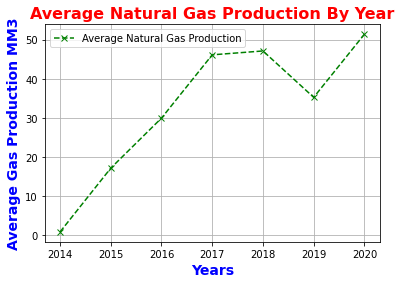

In [ ]:
#grouping gas prod by year
aveYearlyGasProd = pd.DataFrame(pet_gas_prod_cleaned.groupby(['YEAR'])['GAS_CUM_VOL_MM3'].agg('mean'))
print(aveYearlyGasProd)
years= aveYearlyGasProd.index
averageGasProdByYear = aveYearlyGasProd['GAS_CUM_VOL_MM3'].values

plt.plot(years, averageGasProdByYear, 'g--x', label = 'Average Natural Gas Production')
plt.title('Average Natural Gas Production By Year', color = 'red', fontsize = 16, fontweight="bold")
plt.xlabel('Years', color = "Blue", fontsize=14, fontweight="bold")
plt.ylabel('Average Gas Production MM3',color= "Blue", fontsize=14, fontweight="bold")
plt.xticks(years)
plt.grid()
plt.legend()
plt.show();

###Displaying the Average Petroleum Production by Year

      OIL_CUM_VOL_MMBBL
YEAR                   
2014               0.00
2015               0.00
2016               0.00
2017               0.00
2018               0.00
2019               0.00
2020               0.00


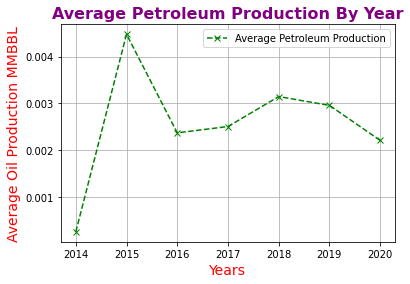

In [ ]:
#grouping oil prod by year
aveYearlyOilProd = pd.DataFrame(pet_gas_prod_cleaned.groupby(['YEAR'])['OIL_CUM_VOL_MMBBL'].agg('mean'))
print(aveYearlyOilProd)
years= aveYearlyOilProd.index
averageOilProdByYear = aveYearlyOilProd['OIL_CUM_VOL_MMBBL'].values

plt.plot(years, averageOilProdByYear, 'g--x', label = 'Average Petroleum Production')
plt.title('Average Petroleum Production By Year', color = 'purple', fontsize = 16, fontweight="bold")
plt.xlabel('Years', color = "red", fontsize=14)
plt.ylabel('Average Oil Production MMBBL',color= "red", fontsize=14)
plt.xticks(years)
plt.grid()
plt.legend()
plt.show();

###Displaying the Average Liquefied Petroleum Gas (LPG) Production by Year

      LPG_CUM_VOL_KT
YEAR                
2014            0.01
2015            0.20
2016            0.04
2017            0.05
2018            0.07
2019            0.05
2020            0.06


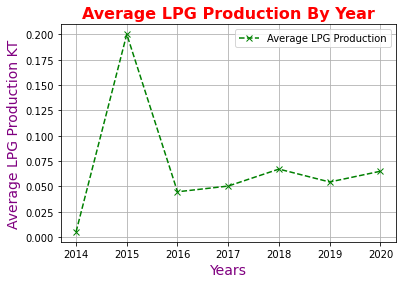

In [ ]:
#grouping oil prod by year
aveYearlyLPGProd = pd.DataFrame(pet_gas_prod_cleaned.groupby(['YEAR'])['LPG_CUM_VOL_KT'].agg('mean'))
print(aveYearlyLPGProd)
years= aveYearlyLPGProd.index
averageLPGProdByYear = aveYearlyLPGProd['LPG_CUM_VOL_KT'].values

plt.plot(years, averageLPGProdByYear, 'g--x', label = 'Average LPG Production')
plt.title('Average LPG Production By Year', color = 'red', fontsize = 16, fontweight="bold")
plt.xlabel('Years', color = "purple", fontsize=14)
plt.ylabel('Average LPG Production KT',color= "purple", fontsize=14)
plt.xticks(years)
plt.grid()
plt.legend()
plt.show();


###Displaying the Average Condensates Production by Year

      CONDENSATE_CUM_VOL_MMBBL
YEAR                          
2014                      0.00
2015                      0.00
2016                      0.00
2017                      0.00
2018                      0.00
2019                      0.00
2020                      0.00


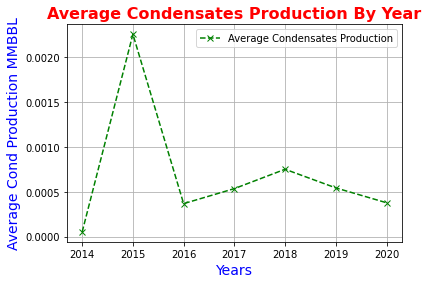

In [ ]:
#grouping condensates prod by year
aveYearlyCondProd = pd.DataFrame(pet_gas_prod_cleaned.groupby(['YEAR'])['CONDENSATE_CUM_VOL_MMBBL'].agg('mean'))
print(aveYearlyCondProd)
years= aveYearlyCondProd.index
averageCondProdByYear = aveYearlyCondProd['CONDENSATE_CUM_VOL_MMBBL'].values

plt.plot(years, averageCondProdByYear, 'g--x', label = 'Average Condensates Production')
plt.title('Average Condensates Production By Year', color = 'red', fontsize = 16, fontweight="bold")
plt.xlabel('Years', color = "blue", fontsize=14)
plt.ylabel('Average Cond Production MMBBL',color= "blue", fontsize=14)
plt.xticks(years)
plt.grid()
plt.legend()
plt.show();


##Displaying the Percentage of Gas Flared in Queensland by Year

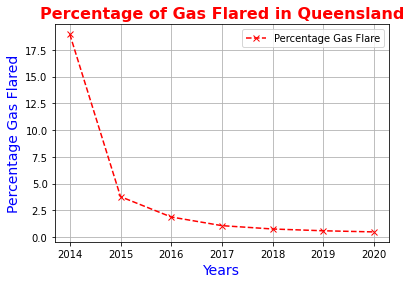

In [ ]:
#bar chart for total yearly sales and technology_wise yearly sales
GasProdByYear = pd.DataFrame(pet_gas_prod_cleaned.groupby(['YEAR'])['GAS_CUM_VOL_MM3'].agg('sum'))
yearlyGasProd = GasProdByYear['GAS_CUM_VOL_MM3'].values

gasFlarePercent = pd.DataFrame((pet_gas_prod_cleaned.groupby(['YEAR'])['GAS_FLARED_vOL_MM3'].agg('sum')/ pet_gas_prod_cleaned.groupby(['YEAR'])['GAS_CUM_VOL_MM3'].agg('sum')) * 100)
gasFlarePercentByYear = gasFlarePercent.values

years = GasProdByYear.index

plt.plot(years, gasFlarePercentByYear, 'r--x', label = 'Percentage Gas Flare')

plt.title('Percentage of Gas Flared in Queensland', color = 'red', fontsize = 16, fontweight="bold")
plt.xlabel('Years', color = "Blue", fontsize=14)
plt.ylabel('Percentage Gas Flared', color= "Blue", fontsize=14)
plt.xticks(years)
plt.grid()
plt.legend()
plt.show();

##Displaying Total Gas Produced by Year and Gas Flare Percentage on a Plot

Percentage of Gas Flared From 2014 Down to 2020:
 [[18.96306818]
 [ 3.77541513]
 [ 1.87220137]
 [ 1.06346837]
 [ 0.75170502]
 [ 0.58487986]
 [ 0.47846263]]


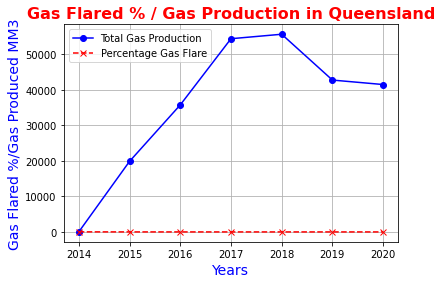

In [ ]:
#bar chart for total yearly sales and technology_wise yearly sales
GasProdByYear = pd.DataFrame(pet_gas_prod_cleaned.groupby(['YEAR'])['GAS_CUM_VOL_MM3'].agg('sum'))
yearlyGasProd = GasProdByYear['GAS_CUM_VOL_MM3'].values

gasFlarePercent = pd.DataFrame((pet_gas_prod_cleaned.groupby(['YEAR'])['GAS_FLARED_vOL_MM3'].agg('sum')/ pet_gas_prod_cleaned.groupby(['YEAR'])['GAS_CUM_VOL_MM3'].agg('sum')) * 100)
gasFlarePercentByYear = gasFlarePercent.values
print(f"Percentage of Gas Flared From 2014 Down to 2020:\n", gasFlarePercentByYear)

years = GasProdByYear.index

plt.plot(years, yearlyGasProd,'b-o', label = 'Total Gas Production')
plt.plot(years, gasFlarePercentByYear, 'r--x', label = 'Percentage Gas Flare')

plt.title('Gas Flared % / Gas Production in Queensland', color = 'red', fontsize = 16, fontweight="bold")
plt.xlabel('Years', color = "Blue", fontsize=14)
plt.ylabel('Gas Flared %/Gas Produced MM3', color= "Blue", fontsize=14)
plt.xticks(years)
plt.grid()
plt.legend()
plt.show();

##Comparison Display Between Production Types

###Showing a Plot Comparison of Natural Gas Production by Both Production Types

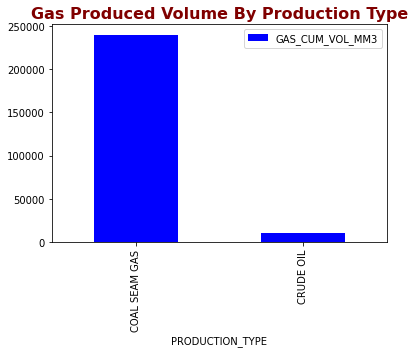

In [ ]:
#grouping by production types

#grouping gas prod by production type
prodType = pd.DataFrame(pet_gas_prod_cleaned.groupby(['PRODUCTION_TYPE'])['GAS_CUM_VOL_MM3'].agg('sum'))

prodType.plot.bar(color="blue")
plt.title("Gas Produced Volume By Production Type", color = 'maroon', fontsize = 16, fontweight="bold")
plt.show();

###Showing a Plot Comparison of Condensates Production by Both Production Types

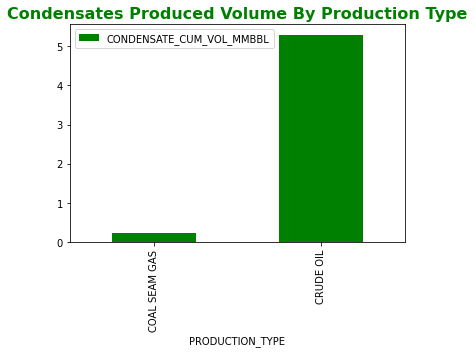

In [ ]:
#grouping by production types

#grouping condensates prod by production type
prodType = pd.DataFrame(pet_gas_prod_cleaned.groupby(['PRODUCTION_TYPE'])['CONDENSATE_CUM_VOL_MMBBL'].agg('sum'))

prodType.plot.bar(color="green")
plt.title("Condensates Produced Volume By Production Type", color = 'green', fontsize = 16, fontweight="bold")
plt.legend()
plt.show();

##Displaying the Top Oil Producer in Queensland

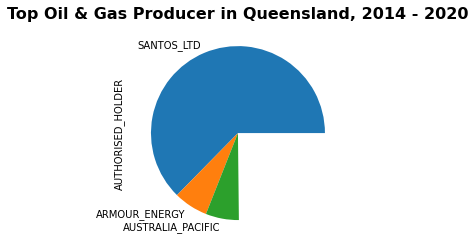

In [ ]:
#plot the pie chart of percentage Age Rating categories
pet_gas_prod_cleaned['AUTHORISED_HOLDER'].value_counts(normalize=True).head(3).plot.pie()
plt.title('Top Oil & Gas Producer in Queensland, 2014 - 2020', fontsize = 16, fontweight="bold")
plt.show();

##Displaying the Top 5 Basins in Queensland

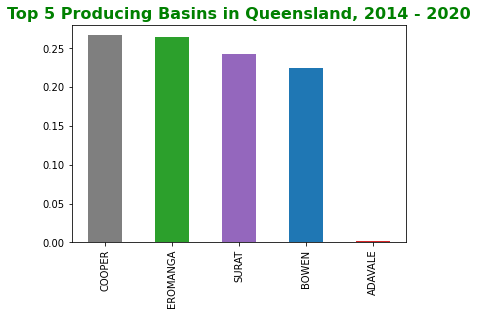

In [ ]:
#assign colors to each basin
bar_colors = ['tab:grey', 'tab:green', 'tab:purple', 'tab:blue', 'tab:red']

#displaying the top oil producer
topProducingBasin = pet_gas_prod_cleaned['BASIN'].value_counts(normalize=True).head(5)

topProducingBasin.plot.bar(color=bar_colors)

plt.title('Top 5 Producing Basins in Queensland, 2014 - 2020', color = 'green', fontsize = 16, fontweight="bold")

plt.show();

##Displaying the top 5 Reservoirs in Queensland

Displaying the top 5 Fields in Queensland

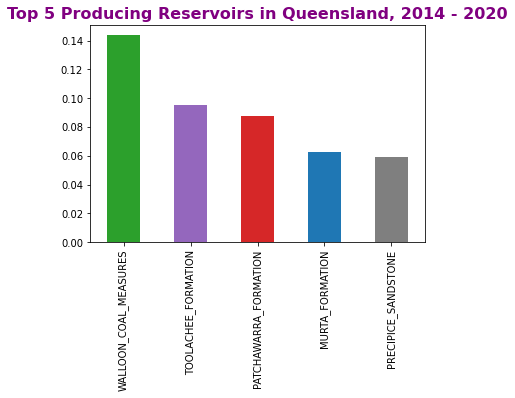

In [ ]:
#assign colors to each reservoir
bar_colors = ['tab:green', 'tab:purple', 'tab:red', 'tab:blue', 'tab:grey']

#displaying the top oil producer
topProducingRes = pet_gas_prod_cleaned['RESERVOIR_UNIT_NAME'].value_counts(normalize=True).head(5)

topProducingRes.plot.bar(color=bar_colors)

plt.title('Top 5 Producing Reservoirs in Queensland, 2014 - 2020', color = 'purple', fontsize = 16, fontweight="bold")

plt.show();

##Top 5 Producing Fields in Queensland

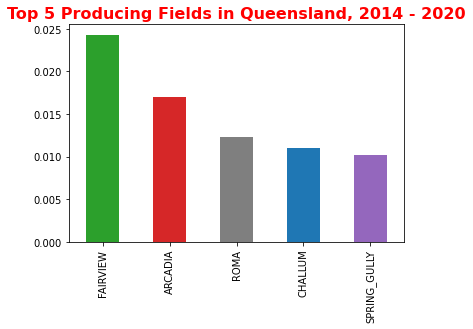

In [ ]:
#assign colors to each field
bar_colors = ['tab:green', 'tab:red', 'tab:grey', 'tab:blue', 'tab:purple']

#displaying the top oil producer
topProducingField = pet_gas_prod_cleaned['FIELD_NAME'].value_counts(normalize=True).head(5)

topProducingField.plot.bar(color=bar_colors)

plt.title('Top 5 Producing Fields in Queensland, 2014 - 2020', color = 'red', fontsize = 16, fontweight="bold")

plt.show();

#Thanks for your time!